<a href="https://colab.research.google.com/github/ikathllen/CLASSIFICAO_MULTICLASSE_SSVEP/blob/master/12_estim_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt, freqs, convolve
from scipy import signal
from sklearn.cross_decomposition import CCA, PLSCanonical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
from scipy import io
v = io.loadmat('data.mat')

In [ ]:
eeg_data = v['eeg']


In [ ]:
eeg_data.shape

(12, 8, 1114, 15)

## 1 - Utilizar o dataset de 12 estimulos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset: https://github.com/mnakanishi/12JFPM_SSVEP/tree/master/data

# lendo os arquirvos .MAT que estão no drive
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/SEU DRIVE')

# variável para guardar os valores da chave 'eeg' do arquivo .MAT
eeg_data = mat['eeg']

eeg_data.shape

(12, 8, 1114, 15)

Neste exemplo, há 12 estímulos SSVEP piscando nas frequências de cintilação correspondentes. O usuário olha para um dos alvos cintilantes em ordem aleatória por 4 segundos. Dessa forma, 15 tentativas são registradas em 8 canais de EEG.

In [ ]:
estimulos = eeg_data.shape[0]
canais = eeg_data.shape[1]
amostras = eeg_data.shape[2]
trials = eeg_data.shape[3]

# Frequências do experimento
frequencias = [9.25, 11.25, 13.25, 9.75, 11.75, 13.75, 10.25, 12.25, 14.25, 10.75, 12.75, 14.75]
canais_desejados = [0, 1, 2, 3, 4, 5, 6, 7]
epocas = 60

# Taxa de amostragem
fs = 256

## 2 - Filtrar em cada estimulo

In [ ]:
# Matriz para armazenar os sinais filtrados
dados_9_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_9_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_9_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_9_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_9_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_9_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_9_25_filt_10_25= np.zeros([canais, amostras, trials])
dados_9_25_filt_12_25= np.zeros([canais, amostras, trials])
dados_9_25_filt_14_25= np.zeros([canais, amostras, trials])
dados_9_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_9_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_9_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_11_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_11_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_11_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_11_25_filt_10_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_12_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_14_25 = np.zeros([canais, amostras, trials])
dados_11_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_11_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_11_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_13_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_13_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_13_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_13_25_filt_10_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_12_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_14_25 = np.zeros([canais, amostras, trials])
dados_13_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_13_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_13_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_9_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_9_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_9_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_9_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_9_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_9_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_9_75_filt_14_75= np.zeros([canais, amostras, trials])

dados_11_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_11_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_11_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_11_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_11_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_11_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_11_75_filt_14_75= np.zeros([canais, amostras, trials])

dados_13_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_13_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_13_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_13_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_13_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_13_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_13_75_filt_14_75= np.zeros([canais, amostras, trials])

dados_10_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_10_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_10_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_10_25_filt_10_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_12_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_14_25 = np.zeros([canais, amostras, trials])
dados_10_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_10_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_10_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_12_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_12_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_12_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_12_25_filt_10_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_12_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_14_25 = np.zeros([canais, amostras, trials])
dados_12_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_12_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_12_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_14_25_filt_9_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_11_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_13_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_9_75 = np.zeros([canais, amostras, trials])
dados_14_25_filt_11_75= np.zeros([canais, amostras, trials])
dados_14_25_filt_13_75= np.zeros([canais, amostras, trials])
dados_14_25_filt_10_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_12_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_14_25 = np.zeros([canais, amostras, trials])
dados_14_25_filt_10_75= np.zeros([canais, amostras, trials])
dados_14_25_filt_12_75= np.zeros([canais, amostras, trials])
dados_14_25_filt_14_75= np.zeros([canais, amostras, trials])

dados_10_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_10_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_10_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_10_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_10_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_10_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_10_75_filt_14_75= np.zeros([canais, amostras, trials])

dados_12_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_12_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_12_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_12_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_12_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_12_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_12_75_filt_14_75= np.zeros([canais, amostras, trials])

dados_14_75_filt_9_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_11_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_13_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_9_75 = np.zeros([canais, amostras, trials])
dados_14_75_filt_11_75= np.zeros([canais, amostras, trials])
dados_14_75_filt_13_75= np.zeros([canais, amostras, trials])
dados_14_75_filt_10_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_12_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_14_25 = np.zeros([canais, amostras, trials])
dados_14_75_filt_10_75= np.zeros([canais, amostras, trials])
dados_14_75_filt_12_75= np.zeros([canais, amostras, trials])
dados_14_75_filt_14_75= np.zeros([canais, amostras, trials])

In [ ]:
corte = 0.75
# Definindo o filtro passa banda para 9.25Hz
b_9_25, a_9_25 = butter(5,[9.25-corte, 9.25+corte],'bandpass',fs = 256)
w_9_25 ,h_9_25 = freqz(b_9_25, a_9_25, fs = 256)

# Definindo o filtro passa banda para 11.25Hz
b_11_25, a_11_25 = butter(5,[11.25-corte, 11.25+corte],'bandpass',fs = 256)
w_11_25 ,h_11_25 = freqz(b_11_25, a_11_25, fs = 256)

# Definindo o filtro passa banda para 13.25Hz
b_13_25, a_13_25 = butter(5,[13.25-corte, 13.25+corte],'bandpass',fs = 256)
w_13_25 ,h_13_25 = freqz(b_13_25, a_13_25, fs = 256)

# Definindo o filtro passa banda para 9.75Hz
b_9_75, a_9_75 = butter(5,[9.75-corte, 9.75+corte],'bandpass',fs = 256)
w_9_75 ,h_9_75 = freqz(b_9_75, a_9_75, fs = 256)

# Definindo o filtro passa banda para 11.75Hz
b_11_75, a_11_75 = butter(5,[11.75-corte, 11.75+corte],'bandpass',fs = 256)
w_11_75 ,h_11_75 = freqz(b_11_75, a_11_75, fs = 256)

# Definindo o filtro passa banda para 13.75Hz
b_13_75, a_13_75 = butter(5,[13.75-corte, 13.75+corte],'bandpass',fs = 256)
w_13_75 ,h_13_75 = freqz(b_13_75, a_13_75, fs = 256)

# Definindo o filtro passa banda para 10.25Hz
b_10_25, a_10_25 = butter(5,[10.25-corte, 10.25+corte],'bandpass',fs = 256)
w_10_25 ,h_10_25 = freqz(b_10_25, a_10_25, fs = 256)

# Definindo o filtro passa banda para 12.25Hz
b_12_25, a_12_25 = butter(5,[12.25-corte, 12.25+corte],'bandpass',fs = 256)
w_12_25 ,h_12_25 = freqz(b_12_25, a_12_25, fs = 256)

# Definindo o filtro passa banda para 14.25Hz
b_14_25, a_14_25 = butter(5,[14.25-corte, 14.25+corte],'bandpass',fs = 256)
w_14_25 ,h_14_25 = freqz(b_14_25, a_14_25, fs = 256)

# Definindo o filtro passa banda para 10.75Hz
b_10_75, a_10_75 = butter(5,[10.75-corte, 10.75+corte],'bandpass',fs = 256)
w_10_75 ,h_10_75 = freqz(b_10_75, a_10_75, fs = 256)

# Definindo o filtro passa banda para 12.75Hz
b_12_75, a_12_75 = butter(5,[12.75-corte, 12.75+corte],'bandpass',fs = 256)
w_12_75 ,h_12_75 = freqz(b_12_75, a_12_75, fs = 256)

# Definindo o filtro passa banda para 14.75Hz
b_14_75, a_14_75 = butter(5,[14.75-corte, 14.75+corte],'bandpass',fs = 256)
w_14_75 ,h_14_75 = freqz(b_14_75, a_14_75, fs = 256)


In [ ]:
# Iniciando o Loop para cada trial (15)
for ind in range(trials):
    # Iniciando o Loop para cada canal
    for channels in canais_desejados:
        dados_9_25_removed_mean = eeg_data[0, channels, :, ind] - np.mean(eeg_data[0, channels, :, ind])
        dados_9_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 9.25Hz
        dados_9_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 11.25Hz
        dados_9_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 13.25Hz
        dados_9_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 9.75Hz
        dados_9_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 11.75H
        dados_9_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 13.75H
        dados_9_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 10.25Hz
        dados_9_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 12.25Hz
        dados_9_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 14.25Hz
        dados_9_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 10.75H
        dados_9_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 12.75H
        dados_9_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_9_25_removed_mean) # Dados de 9.25Hz filtrado em 14.75H


        dados_11_25_removed_mean = eeg_data[1, channels, :, ind] - np.mean(eeg_data[1, channels, :, ind])
        dados_11_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 9.25Hz
        dados_11_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 11.25Hz
        dados_11_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 13.25Hz
        dados_11_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 9.75Hz
        dados_11_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 11.75H
        dados_11_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 13.75H
        dados_11_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 10.25Hz
        dados_11_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 12.25Hz
        dados_11_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 14.25Hz
        dados_11_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 10.75H
        dados_11_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 12.75H
        dados_11_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_11_25_removed_mean) # Dados de 11.25Hz filtrado em 14.75H

        dados_13_25_removed_mean = eeg_data[2, channels,  :, ind] - np.mean(eeg_data[2, channels, :, ind])
        dados_13_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 9.25Hz
        dados_13_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 11.25Hz
        dados_13_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 13.25Hz
        dados_13_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 9.75Hz
        dados_13_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 11.75H
        dados_13_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 13.75H
        dados_13_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 10.25Hz
        dados_13_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 12.25Hz
        dados_13_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 14.25Hz
        dados_13_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 10.75H
        dados_13_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 12.75H
        dados_13_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_13_25_removed_mean) # Dados de 11.25Hz filtrado em 14.75H

        dados_9_75_removed_mean = eeg_data[3, channels, :, ind] - np.mean(eeg_data[3, channels, :, ind])
        dados_9_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 9.25Hz
        dados_9_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 11.25Hz
        dados_9_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 13.25Hz
        dados_9_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 9.75Hz
        dados_9_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 11.75H
        dados_9_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 13.75H
        dados_9_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 10.25Hz
        dados_9_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 12.25Hz
        dados_9_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 14.25Hz
        dados_9_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 10.75H
        dados_9_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 12.75H
        dados_9_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_9_75_removed_mean) # Dados de 9.75Hz filtrado em 14.75H

        dados_11_75_removed_mean = eeg_data[4, channels, :, ind] - np.mean(eeg_data[4, channels, :, ind])
        dados_11_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 9.25Hz
        dados_11_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 11.25Hz
        dados_11_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 13.25Hz
        dados_11_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 9.75Hz
        dados_11_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 11.75H
        dados_11_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 13.75H
        dados_11_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 10.25Hz
        dados_11_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 12.25Hz
        dados_11_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 14.25Hz
        dados_11_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 10.75H
        dados_11_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 12.75H
        dados_11_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_12_75, dados_11_75_removed_mean) # Dados de 11.75Hz filtrado em 14.75H

        dados_13_75_removed_mean = eeg_data[5, channels, :, ind] - np.mean(eeg_data[5, channels, :, ind])
        dados_13_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 9.25Hz
        dados_13_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 11.25Hz
        dados_13_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 13.25Hz
        dados_13_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 9.75Hz
        dados_13_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 11.75H
        dados_13_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 13.75H
        dados_13_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 10.25Hz
        dados_13_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 12.25Hz
        dados_13_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 14.25Hz
        dados_13_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 10.75H
        dados_13_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 12.75H
        dados_13_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_13_75_removed_mean) # Dados de 13.75Hz filtrado em 14.75H

        dados_10_25_removed_mean = eeg_data[6, channels, :, ind] - np.mean(eeg_data[6, channels, :, ind])
        dados_10_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 9.25Hz
        dados_10_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 11.25Hz
        dados_10_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 13.25Hz
        dados_10_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 9.75Hz
        dados_10_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 11.75H
        dados_10_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 13.75H
        dados_10_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 10.25Hz
        dados_10_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 12.25Hz
        dados_10_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 14.25Hz
        dados_10_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 10.75H
        dados_10_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 12.75H
        dados_10_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_10_25_removed_mean) # Dados de 10.25Hz filtrado em 14.75H

        dados_12_25_removed_mean = eeg_data[7, channels, :, ind] - np.mean(eeg_data[7, channels, :, ind])
        dados_12_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 9.25Hz
        dados_12_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 11.25Hz
        dados_12_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 13.25Hz
        dados_12_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 9.75Hz
        dados_12_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 11.75H
        dados_12_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 13.75H
        dados_12_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 10.25Hz
        dados_12_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 12.25Hz
        dados_12_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 14.25Hz
        dados_12_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 10.75H
        dados_12_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 12.75H
        dados_12_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_12_25_removed_mean) # Dados de 12.25Hz filtrado em 14.75H

        dados_14_25_removed_mean = eeg_data[8, channels, :, ind] - np.mean(eeg_data[8, channels, :, ind])
        dados_14_25_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 9.25Hz
        dados_14_25_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 11.25Hz
        dados_14_25_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 13.25Hz
        dados_14_25_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 9.75Hz
        dados_14_25_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 11.75H
        dados_14_25_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 13.75H
        dados_14_25_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 10.25Hz
        dados_14_25_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 12.25Hz
        dados_14_25_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 14.25Hz
        dados_14_25_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 10.75H
        dados_14_25_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 12.75H
        dados_14_25_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_14_25_removed_mean) # Dados de 14.25Hz filtrado em 14.75H

        dados_10_75_removed_mean = eeg_data[9, channels, :, ind] - np.mean(eeg_data[9, channels, :, ind])
        dados_10_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 9.25Hz
        dados_10_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 11.25Hz
        dados_10_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 13.25Hz
        dados_10_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 9.75Hz
        dados_10_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 11.75H
        dados_10_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 13.75H
        dados_10_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 10.25Hz
        dados_10_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 12.25Hz
        dados_10_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 14.25Hz
        dados_10_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 10.75H
        dados_10_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 12.75H
        dados_10_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_10_75_removed_mean) # Dados de 10.75Hz filtrado em 14.75H

        dados_12_75_removed_mean = eeg_data[10, channels, :, ind] - np.mean(eeg_data[10, channels, :, ind])
        dados_12_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 9.25Hz
        dados_12_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 11.25Hz
        dados_12_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 13.25Hz
        dados_12_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 9.75Hz
        dados_12_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 11.75H
        dados_12_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 13.75H
        dados_12_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 10.25Hz
        dados_12_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 12.25Hz
        dados_12_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 14.25Hz
        dados_12_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 10.75H
        dados_12_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 12.75H
        dados_12_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_12_75_removed_mean) # Dados de 12.75Hz filtrado em 14.75H

        dados_14_75_removed_mean = eeg_data[11, channels, :, ind] - np.mean(eeg_data[11, channels, :, ind])
        dados_14_75_filt_9_25[channels, :, ind] = lfilter(b_9_25, a_9_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 9.25Hz
        dados_14_75_filt_11_25[channels, :, ind] = lfilter(b_11_25, a_11_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 11.25Hz
        dados_14_75_filt_13_25[channels, :, ind] = lfilter(b_13_25, a_13_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 13.25Hz
        dados_14_75_filt_9_75[channels, :, ind] = lfilter(b_9_75, a_9_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 9.75Hz
        dados_14_75_filt_11_75[channels, :, ind] = lfilter(b_11_75, a_11_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 11.75H
        dados_14_75_filt_13_75[channels, :, ind] = lfilter(b_13_75, a_13_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 13.75H
        dados_14_75_filt_10_25[channels, :, ind] = lfilter(b_10_25, a_10_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 10.25Hz
        dados_14_75_filt_12_25[channels, :, ind] = lfilter(b_12_25, a_12_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 12.25Hz
        dados_14_75_filt_14_25[channels, :, ind] = lfilter(b_14_25, a_14_25, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 14.25Hz
        dados_14_75_filt_10_75[channels, :, ind] = lfilter(b_10_75, a_10_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 10.75H
        dados_14_75_filt_12_75[channels, :, ind] = lfilter(b_12_75, a_12_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 12.75H
        dados_14_75_filt_14_75[channels, :, ind] = lfilter(b_14_75, a_14_75, dados_14_75_removed_mean) # Dados de 14.75Hz filtrado em 14.75H

In [ ]:
print(dados_11_75_filt_9_25.shape)
print(dados_11_75_filt_11_25.shape)
print(dados_11_75_filt_13_25.shape)
print(dados_11_75_filt_9_75.shape)
print(dados_11_75_filt_11_75.shape)
print(dados_11_75_filt_13_75.shape)
print(dados_11_75_filt_10_25.shape)
print(dados_11_75_filt_12_25.shape)
print(dados_11_75_filt_14_25.shape)
print(dados_11_75_filt_10_75.shape)
print(dados_11_75_filt_12_75.shape)
print(dados_11_75_filt_14_75.shape)

(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)
(8, 1114, 15)


### 2.1 - Gerar um gráfico da resposta de estímulo para cada filtragem (FFT) - 1 sujeito

In [ ]:
# Frequências
frequencias = [9.25, 11.25, 13.25, 9.75, 11.75, 13.75, 10.25, 12.25, 14.25, 10.75, 12.75, 14.75]
canal_escolhido = 6
trial = 6
estim = '9_25'

# Dados
dados = [
    f'dados_{estim}_filt_9_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_11_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_13_25[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_9_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_11_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_13_75[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_10_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_12_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_14_25[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_10_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_12_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_14_75[{canal_escolhido}, :, {trial}]'
]

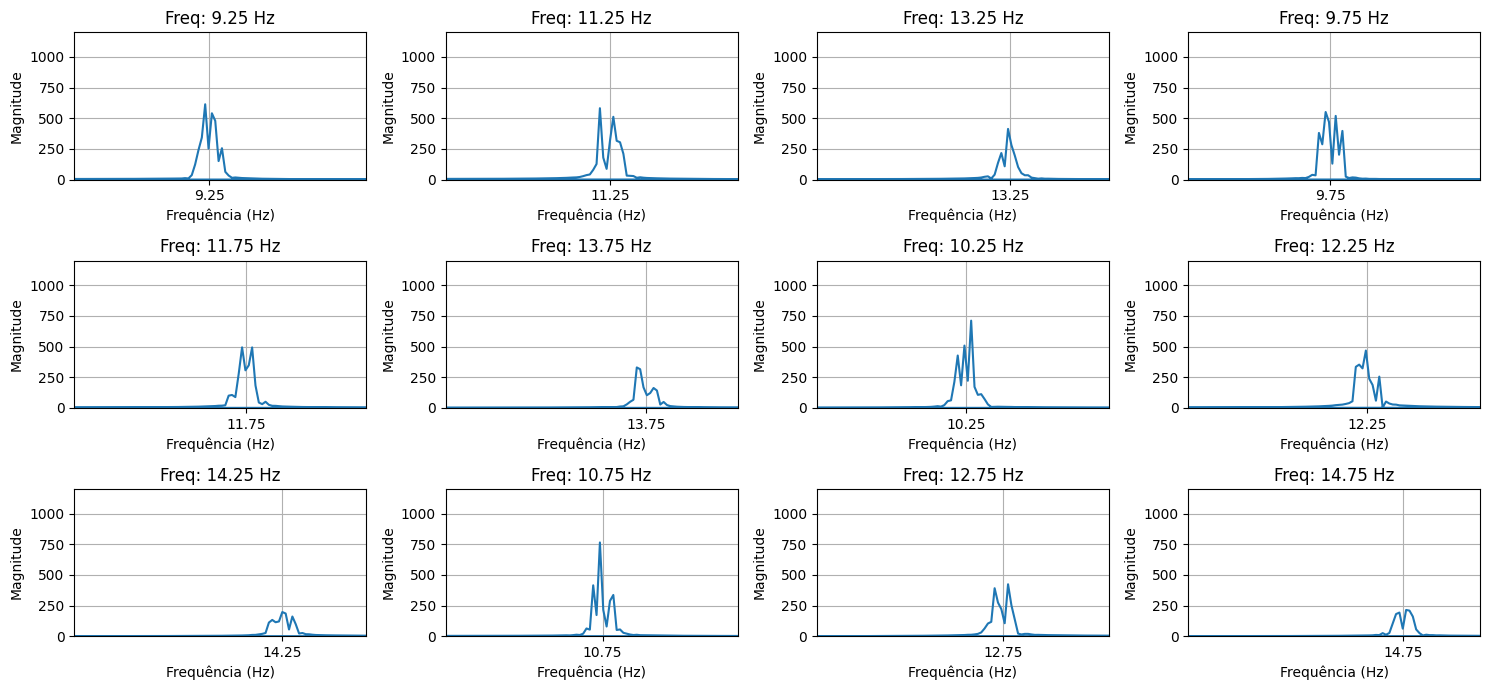

In [ ]:
# Layout de subplots 2x3
fig, axs = plt.subplots(3, 4, figsize=(15, 7))

# Calcular a FFT e plotar os gráficos
for i, dado_str in enumerate(dados):
    linha = i // 4
    coluna = i % 4

    # Dados reais
    dado = eval(dado_str)

    # Calcular la FFT
    fft_resultado = np.fft.fft(dado)
    freq = np.fft.fftfreq(len(dado), d=1/fs)

    # Design
    axs[linha, coluna].plot(freq, np.abs(fft_resultado))
    axs[linha, coluna].set_title(f'Freq: {frequencias[i]} Hz')
    axs[linha, coluna].set_xlabel('Frequência (Hz)')
    axs[linha, coluna].set_ylabel('Magnitude')
    axs[linha, coluna].set_ylim([0, 1200])
    axs[linha, coluna].set_xlim([0, 20])
    axs[linha, coluna].set_xticks([frequencias[i]])
    axs[linha, coluna].grid()

plt.tight_layout()
plt.show()

## 3 - Adicionar extração de épocas

### 3.1 - Sem sobreposição

In [ ]:
# def extrair_epocas(dados):
#     canais, amostras, trials = dados.shape
#     Fs = 256
#     tamanho_epoca = Fs
#     num_total_epocas = 4 * trials
#     epocas = np.ones((canais, Fs, num_total_epocas))
#     k = 0

#     for trial in np.arange(trials):
#         for i in range(89, amostras, tamanho_epoca):
#             # print(i)
#             if i + tamanho_epoca <= amostras:  # Verifica se não ultrapassa o final dos dados
#                 epocas[:, :, k] = dados[:, i:i + tamanho_epoca, trial]
#                 k += 1
#     return epocas

# epocas_9_25_filt_9_25 = extrair_epocas(dados_9_25_filt_9_25)
# epocas_9_25_filt_11_25 = extrair_epocas(dados_9_25_filt_11_25)
# epocas_9_25_filt_13_25 = extrair_epocas(dados_9_25_filt_13_25)
# epocas_9_25_filt_9_75 = extrair_epocas(dados_9_25_filt_9_75)
# epocas_9_25_filt_11_75 = extrair_epocas(dados_9_25_filt_11_75)
# epocas_9_25_filt_13_75 = extrair_epocas(dados_9_25_filt_13_75)
# epocas_9_25_filt_10_25 = extrair_epocas(dados_9_25_filt_10_25)
# epocas_9_25_filt_12_25 = extrair_epocas(dados_9_25_filt_12_25)
# epocas_9_25_filt_14_25 = extrair_epocas(dados_9_25_filt_14_25)
# epocas_9_25_filt_10_75 = extrair_epocas(dados_9_25_filt_10_75)
# epocas_9_25_filt_12_75 = extrair_epocas(dados_9_25_filt_12_75)
# epocas_9_25_filt_14_75 = extrair_epocas(dados_9_25_filt_14_75)

# epocas_11_25_filt_9_25 = extrair_epocas(dados_11_25_filt_9_25)
# epocas_11_25_filt_11_25 = extrair_epocas(dados_11_25_filt_11_25)
# epocas_11_25_filt_13_25 = extrair_epocas(dados_11_25_filt_13_25)
# epocas_11_25_filt_9_75 = extrair_epocas(dados_11_25_filt_9_75)
# epocas_11_25_filt_11_75 = extrair_epocas(dados_11_25_filt_11_75)
# epocas_11_25_filt_13_75 = extrair_epocas(dados_11_25_filt_13_75)
# epocas_11_25_filt_10_25 = extrair_epocas(dados_11_25_filt_10_25)
# epocas_11_25_filt_12_25 = extrair_epocas(dados_11_25_filt_12_25)
# epocas_11_25_filt_14_25 = extrair_epocas(dados_11_25_filt_14_25)
# epocas_11_25_filt_10_75 = extrair_epocas(dados_11_25_filt_10_75)
# epocas_11_25_filt_12_75 = extrair_epocas(dados_11_25_filt_12_75)
# epocas_11_25_filt_14_75 = extrair_epocas(dados_11_25_filt_14_75)

# epocas_13_25_filt_9_25 = extrair_epocas(dados_13_25_filt_9_25)
# epocas_13_25_filt_11_25 = extrair_epocas(dados_13_25_filt_11_25)
# epocas_13_25_filt_13_25 = extrair_epocas(dados_13_25_filt_13_25)
# epocas_13_25_filt_9_75 = extrair_epocas(dados_13_25_filt_9_75)
# epocas_13_25_filt_11_75 = extrair_epocas(dados_13_25_filt_11_75)
# epocas_13_25_filt_13_75 = extrair_epocas(dados_13_25_filt_13_75)
# epocas_13_25_filt_10_25 = extrair_epocas(dados_13_25_filt_10_25)
# epocas_13_25_filt_12_25 = extrair_epocas(dados_13_25_filt_12_25)
# epocas_13_25_filt_14_25 = extrair_epocas(dados_13_25_filt_14_25)
# epocas_13_25_filt_10_75 = extrair_epocas(dados_13_25_filt_10_75)
# epocas_13_25_filt_12_75 = extrair_epocas(dados_13_25_filt_12_75)
# epocas_13_25_filt_14_75 = extrair_epocas(dados_13_25_filt_14_75)

# epocas_9_75_filt_9_25 = extrair_epocas(dados_9_75_filt_9_25)
# epocas_9_75_filt_11_25 = extrair_epocas(dados_9_75_filt_11_25)
# epocas_9_75_filt_13_25 = extrair_epocas(dados_9_75_filt_13_25)
# epocas_9_75_filt_9_75 = extrair_epocas(dados_9_75_filt_9_75)
# epocas_9_75_filt_11_75 = extrair_epocas(dados_9_75_filt_11_75)
# epocas_9_75_filt_13_75 = extrair_epocas(dados_9_75_filt_13_75)
# epocas_9_75_filt_10_25 = extrair_epocas(dados_9_75_filt_10_25)
# epocas_9_75_filt_12_25 = extrair_epocas(dados_9_75_filt_12_25)
# epocas_9_75_filt_14_25 = extrair_epocas(dados_9_75_filt_14_25)
# epocas_9_75_filt_10_75 = extrair_epocas(dados_9_75_filt_10_75)
# epocas_9_75_filt_12_75 = extrair_epocas(dados_9_75_filt_12_75)
# epocas_9_75_filt_14_75 = extrair_epocas(dados_9_75_filt_14_75)

# epocas_11_75_filt_9_25 = extrair_epocas(dados_11_75_filt_9_25)
# epocas_11_75_filt_11_25 = extrair_epocas(dados_11_75_filt_11_25)
# epocas_11_75_filt_13_25 = extrair_epocas(dados_11_75_filt_13_25)
# epocas_11_75_filt_9_75 = extrair_epocas(dados_11_75_filt_9_75)
# epocas_11_75_filt_11_75 = extrair_epocas(dados_11_75_filt_11_75)
# epocas_11_75_filt_13_75 = extrair_epocas(dados_11_75_filt_13_75)
# epocas_11_75_filt_10_25 = extrair_epocas(dados_11_75_filt_10_25)
# epocas_11_75_filt_12_25 = extrair_epocas(dados_11_75_filt_12_25)
# epocas_11_75_filt_14_25 = extrair_epocas(dados_11_75_filt_14_25)
# epocas_11_75_filt_10_75 = extrair_epocas(dados_11_75_filt_10_75)
# epocas_11_75_filt_12_75 = extrair_epocas(dados_11_75_filt_12_75)
# epocas_11_75_filt_14_75 = extrair_epocas(dados_11_75_filt_14_75)

# epocas_13_75_filt_9_25 = extrair_epocas(dados_13_75_filt_9_25)
# epocas_13_75_filt_11_25 = extrair_epocas(dados_13_75_filt_11_25)
# epocas_13_75_filt_13_25 = extrair_epocas(dados_13_75_filt_13_25)
# epocas_13_75_filt_9_75 = extrair_epocas(dados_13_75_filt_9_75)
# epocas_13_75_filt_11_75 = extrair_epocas(dados_13_75_filt_11_75)
# epocas_13_75_filt_13_75 = extrair_epocas(dados_13_75_filt_13_75)
# epocas_13_75_filt_10_25 = extrair_epocas(dados_13_75_filt_10_25)
# epocas_13_75_filt_12_25 = extrair_epocas(dados_13_75_filt_12_25)
# epocas_13_75_filt_14_25 = extrair_epocas(dados_13_75_filt_14_25)
# epocas_13_75_filt_10_75 = extrair_epocas(dados_13_75_filt_10_75)
# epocas_13_75_filt_12_75 = extrair_epocas(dados_13_75_filt_12_75)
# epocas_13_75_filt_14_75 = extrair_epocas(dados_13_75_filt_14_75)

# epocas_10_25_filt_9_25 = extrair_epocas(dados_10_25_filt_9_25)
# epocas_10_25_filt_11_25 = extrair_epocas(dados_10_25_filt_11_25)
# epocas_10_25_filt_13_25 = extrair_epocas(dados_10_25_filt_13_25)
# epocas_10_25_filt_9_75 = extrair_epocas(dados_10_25_filt_9_75)
# epocas_10_25_filt_11_75 = extrair_epocas(dados_10_25_filt_11_75)
# epocas_10_25_filt_13_75 = extrair_epocas(dados_10_25_filt_13_75)
# epocas_10_25_filt_10_25 = extrair_epocas(dados_10_25_filt_10_25)
# epocas_10_25_filt_12_25 = extrair_epocas(dados_10_25_filt_12_25)
# epocas_10_25_filt_14_25 = extrair_epocas(dados_10_25_filt_14_25)
# epocas_10_25_filt_10_75 = extrair_epocas(dados_10_25_filt_10_75)
# epocas_10_25_filt_12_75 = extrair_epocas(dados_10_25_filt_12_75)
# epocas_10_25_filt_14_75 = extrair_epocas(dados_10_25_filt_14_75)

# epocas_12_25_filt_9_25 = extrair_epocas(dados_12_25_filt_9_25)
# epocas_12_25_filt_11_25 = extrair_epocas(dados_12_25_filt_11_25)
# epocas_12_25_filt_13_25 = extrair_epocas(dados_12_25_filt_13_25)
# epocas_12_25_filt_9_75 = extrair_epocas(dados_12_25_filt_9_75)
# epocas_12_25_filt_11_75 = extrair_epocas(dados_12_25_filt_11_75)
# epocas_12_25_filt_13_75 = extrair_epocas(dados_12_25_filt_13_75)
# epocas_12_25_filt_10_25 = extrair_epocas(dados_12_25_filt_10_25)
# epocas_12_25_filt_12_25 = extrair_epocas(dados_12_25_filt_12_25)
# epocas_12_25_filt_14_25 = extrair_epocas(dados_12_25_filt_14_25)
# epocas_12_25_filt_10_75 = extrair_epocas(dados_12_25_filt_10_75)
# epocas_12_25_filt_12_75 = extrair_epocas(dados_12_25_filt_12_75)
# epocas_12_25_filt_14_75 = extrair_epocas(dados_12_25_filt_14_75)

# epocas_14_25_filt_9_25 = extrair_epocas(dados_14_25_filt_9_25)
# epocas_14_25_filt_11_25 = extrair_epocas(dados_14_25_filt_11_25)
# epocas_14_25_filt_13_25 = extrair_epocas(dados_14_25_filt_13_25)
# epocas_14_25_filt_9_75 = extrair_epocas(dados_14_25_filt_9_75)
# epocas_14_25_filt_11_75 = extrair_epocas(dados_14_25_filt_11_75)
# epocas_14_25_filt_13_75 = extrair_epocas(dados_14_25_filt_13_75)
# epocas_14_25_filt_10_25 = extrair_epocas(dados_14_25_filt_10_25)
# epocas_14_25_filt_12_25 = extrair_epocas(dados_14_25_filt_12_25)
# epocas_14_25_filt_14_25 = extrair_epocas(dados_14_25_filt_14_25)
# epocas_14_25_filt_10_75 = extrair_epocas(dados_14_25_filt_10_75)
# epocas_14_25_filt_12_75 = extrair_epocas(dados_14_25_filt_12_75)
# epocas_14_25_filt_14_75 = extrair_epocas(dados_14_25_filt_14_75)

# epocas_10_75_filt_9_25 = extrair_epocas(dados_10_75_filt_9_25)
# epocas_10_75_filt_11_25 = extrair_epocas(dados_10_75_filt_11_25)
# epocas_10_75_filt_13_25 = extrair_epocas(dados_10_75_filt_13_25)
# epocas_10_75_filt_9_75 = extrair_epocas(dados_10_75_filt_9_75)
# epocas_10_75_filt_11_75 = extrair_epocas(dados_10_75_filt_11_75)
# epocas_10_75_filt_13_75 = extrair_epocas(dados_10_75_filt_13_75)
# epocas_10_75_filt_10_25 = extrair_epocas(dados_10_75_filt_10_25)
# epocas_10_75_filt_12_25 = extrair_epocas(dados_10_75_filt_12_25)
# epocas_10_75_filt_14_25 = extrair_epocas(dados_10_75_filt_14_25)
# epocas_10_75_filt_10_75 = extrair_epocas(dados_10_75_filt_10_75)
# epocas_10_75_filt_12_75 = extrair_epocas(dados_10_75_filt_12_75)
# epocas_10_75_filt_14_75 = extrair_epocas(dados_10_75_filt_14_75)

# epocas_12_75_filt_9_25 = extrair_epocas(dados_12_75_filt_9_25)
# epocas_12_75_filt_11_25 = extrair_epocas(dados_12_75_filt_11_25)
# epocas_12_75_filt_13_25 = extrair_epocas(dados_12_75_filt_13_25)
# epocas_12_75_filt_9_75 = extrair_epocas(dados_12_75_filt_9_75)
# epocas_12_75_filt_11_75 = extrair_epocas(dados_12_75_filt_11_75)
# epocas_12_75_filt_13_75 = extrair_epocas(dados_12_75_filt_13_75)
# epocas_12_75_filt_10_25 = extrair_epocas(dados_12_75_filt_10_25)
# epocas_12_75_filt_12_25 = extrair_epocas(dados_12_75_filt_12_25)
# epocas_12_75_filt_14_25 = extrair_epocas(dados_12_75_filt_14_25)
# epocas_12_75_filt_10_75 = extrair_epocas(dados_12_75_filt_10_75)
# epocas_12_75_filt_12_75 = extrair_epocas(dados_12_75_filt_12_75)
# epocas_12_75_filt_14_75 = extrair_epocas(dados_12_75_filt_14_75)

# epocas_14_75_filt_9_25 = extrair_epocas(dados_14_75_filt_9_25)
# epocas_14_75_filt_11_25 = extrair_epocas(dados_14_75_filt_11_25)
# epocas_14_75_filt_13_25 = extrair_epocas(dados_14_75_filt_13_25)
# epocas_14_75_filt_9_75 = extrair_epocas(dados_14_75_filt_9_75)
# epocas_14_75_filt_11_75 = extrair_epocas(dados_14_75_filt_11_75)
# epocas_14_75_filt_13_75 = extrair_epocas(dados_14_75_filt_13_75)
# epocas_14_75_filt_10_25 = extrair_epocas(dados_14_75_filt_10_25)
# epocas_14_75_filt_12_25 = extrair_epocas(dados_14_75_filt_12_25)
# epocas_14_75_filt_14_25 = extrair_epocas(dados_14_75_filt_14_25)
# epocas_14_75_filt_10_75 = extrair_epocas(dados_14_75_filt_10_75)
# epocas_14_75_filt_12_75 = extrair_epocas(dados_14_75_filt_12_75)
# epocas_14_75_filt_14_75 = extrair_epocas(dados_14_75_filt_14_75)

# epocas_13_75_filt_13_75.shape

### 3.2 - Com sobreposição

#### 3.2.1 - Quantidade (50%, 25%, 12,5%)

In [ ]:
def extrair_epocas(dados):
    canais, amostras, trials = dados.shape
    Fs = 256*2
    tamanho_epoca = Fs
    sobreposicao = 128*2  # Sobreposição de 128 amostras
    deslocamento = tamanho_epoca - sobreposicao  # Deslocamento entre as épocas
    num_total_epocas = 3 * trials

    epocas = np.zeros((3, tamanho_epoca, num_total_epocas))
    k = 0

    for trial in range(trials):
        for i in range(90, amostras - tamanho_epoca + 1, deslocamento):
            if i + tamanho_epoca <= amostras:  # Verifica se não ultrapassa o final dos dados
                epocas[:, :, k] = dados[5:, i:i + tamanho_epoca, trial]
                k += 1
    return epocas

epocas_9_25_filt_9_25 = extrair_epocas(dados_9_25_filt_9_25)
epocas_9_25_filt_11_25 = extrair_epocas(dados_9_25_filt_11_25)
epocas_9_25_filt_13_25 = extrair_epocas(dados_9_25_filt_13_25)
epocas_9_25_filt_9_75 = extrair_epocas(dados_9_25_filt_9_75)
epocas_9_25_filt_11_75 = extrair_epocas(dados_9_25_filt_11_75)
epocas_9_25_filt_13_75 = extrair_epocas(dados_9_25_filt_13_75)
epocas_9_25_filt_10_25 = extrair_epocas(dados_9_25_filt_10_25)
epocas_9_25_filt_12_25 = extrair_epocas(dados_9_25_filt_12_25)
epocas_9_25_filt_14_25 = extrair_epocas(dados_9_25_filt_14_25)
epocas_9_25_filt_10_75 = extrair_epocas(dados_9_25_filt_10_75)
epocas_9_25_filt_12_75 = extrair_epocas(dados_9_25_filt_12_75)
epocas_9_25_filt_14_75 = extrair_epocas(dados_9_25_filt_14_75)

epocas_11_25_filt_9_25 = extrair_epocas(dados_11_25_filt_9_25)
epocas_11_25_filt_11_25 = extrair_epocas(dados_11_25_filt_11_25)
epocas_11_25_filt_13_25 = extrair_epocas(dados_11_25_filt_13_25)
epocas_11_25_filt_9_75 = extrair_epocas(dados_11_25_filt_9_75)
epocas_11_25_filt_11_75 = extrair_epocas(dados_11_25_filt_11_75)
epocas_11_25_filt_13_75 = extrair_epocas(dados_11_25_filt_13_75)
epocas_11_25_filt_10_25 = extrair_epocas(dados_11_25_filt_10_25)
epocas_11_25_filt_12_25 = extrair_epocas(dados_11_25_filt_12_25)
epocas_11_25_filt_14_25 = extrair_epocas(dados_11_25_filt_14_25)
epocas_11_25_filt_10_75 = extrair_epocas(dados_11_25_filt_10_75)
epocas_11_25_filt_12_75 = extrair_epocas(dados_11_25_filt_12_75)
epocas_11_25_filt_14_75 = extrair_epocas(dados_11_25_filt_14_75)

epocas_13_25_filt_9_25 = extrair_epocas(dados_13_25_filt_9_25)
epocas_13_25_filt_11_25 = extrair_epocas(dados_13_25_filt_11_25)
epocas_13_25_filt_13_25 = extrair_epocas(dados_13_25_filt_13_25)
epocas_13_25_filt_9_75 = extrair_epocas(dados_13_25_filt_9_75)
epocas_13_25_filt_11_75 = extrair_epocas(dados_13_25_filt_11_75)
epocas_13_25_filt_13_75 = extrair_epocas(dados_13_25_filt_13_75)
epocas_13_25_filt_10_25 = extrair_epocas(dados_13_25_filt_10_25)
epocas_13_25_filt_12_25 = extrair_epocas(dados_13_25_filt_12_25)
epocas_13_25_filt_14_25 = extrair_epocas(dados_13_25_filt_14_25)
epocas_13_25_filt_10_75 = extrair_epocas(dados_13_25_filt_10_75)
epocas_13_25_filt_12_75 = extrair_epocas(dados_13_25_filt_12_75)
epocas_13_25_filt_14_75 = extrair_epocas(dados_13_25_filt_14_75)

epocas_9_75_filt_9_25 = extrair_epocas(dados_9_75_filt_9_25)
epocas_9_75_filt_11_25 = extrair_epocas(dados_9_75_filt_11_25)
epocas_9_75_filt_13_25 = extrair_epocas(dados_9_75_filt_13_25)
epocas_9_75_filt_9_75 = extrair_epocas(dados_9_75_filt_9_75)
epocas_9_75_filt_11_75 = extrair_epocas(dados_9_75_filt_11_75)
epocas_9_75_filt_13_75 = extrair_epocas(dados_9_75_filt_13_75)
epocas_9_75_filt_10_25 = extrair_epocas(dados_9_75_filt_10_25)
epocas_9_75_filt_12_25 = extrair_epocas(dados_9_75_filt_12_25)
epocas_9_75_filt_14_25 = extrair_epocas(dados_9_75_filt_14_25)
epocas_9_75_filt_10_75 = extrair_epocas(dados_9_75_filt_10_75)
epocas_9_75_filt_12_75 = extrair_epocas(dados_9_75_filt_12_75)
epocas_9_75_filt_14_75 = extrair_epocas(dados_9_75_filt_14_75)

epocas_11_75_filt_9_25 = extrair_epocas(dados_11_75_filt_9_25)
epocas_11_75_filt_11_25 = extrair_epocas(dados_11_75_filt_11_25)
epocas_11_75_filt_13_25 = extrair_epocas(dados_11_75_filt_13_25)
epocas_11_75_filt_9_75 = extrair_epocas(dados_11_75_filt_9_75)
epocas_11_75_filt_11_75 = extrair_epocas(dados_11_75_filt_11_75)
epocas_11_75_filt_13_75 = extrair_epocas(dados_11_75_filt_13_75)
epocas_11_75_filt_10_25 = extrair_epocas(dados_11_75_filt_10_25)
epocas_11_75_filt_12_25 = extrair_epocas(dados_11_75_filt_12_25)
epocas_11_75_filt_14_25 = extrair_epocas(dados_11_75_filt_14_25)
epocas_11_75_filt_10_75 = extrair_epocas(dados_11_75_filt_10_75)
epocas_11_75_filt_12_75 = extrair_epocas(dados_11_75_filt_12_75)
epocas_11_75_filt_14_75 = extrair_epocas(dados_11_75_filt_14_75)

epocas_13_75_filt_9_25 = extrair_epocas(dados_13_75_filt_9_25)
epocas_13_75_filt_11_25 = extrair_epocas(dados_13_75_filt_11_25)
epocas_13_75_filt_13_25 = extrair_epocas(dados_13_75_filt_13_25)
epocas_13_75_filt_9_75 = extrair_epocas(dados_13_75_filt_9_75)
epocas_13_75_filt_11_75 = extrair_epocas(dados_13_75_filt_11_75)
epocas_13_75_filt_13_75 = extrair_epocas(dados_13_75_filt_13_75)
epocas_13_75_filt_10_25 = extrair_epocas(dados_13_75_filt_10_25)
epocas_13_75_filt_12_25 = extrair_epocas(dados_13_75_filt_12_25)
epocas_13_75_filt_14_25 = extrair_epocas(dados_13_75_filt_14_25)
epocas_13_75_filt_10_75 = extrair_epocas(dados_13_75_filt_10_75)
epocas_13_75_filt_12_75 = extrair_epocas(dados_13_75_filt_12_75)
epocas_13_75_filt_14_75 = extrair_epocas(dados_13_75_filt_14_75)

epocas_10_25_filt_9_25 = extrair_epocas(dados_10_25_filt_9_25)
epocas_10_25_filt_11_25 = extrair_epocas(dados_10_25_filt_11_25)
epocas_10_25_filt_13_25 = extrair_epocas(dados_10_25_filt_13_25)
epocas_10_25_filt_9_75 = extrair_epocas(dados_10_25_filt_9_75)
epocas_10_25_filt_11_75 = extrair_epocas(dados_10_25_filt_11_75)
epocas_10_25_filt_13_75 = extrair_epocas(dados_10_25_filt_13_75)
epocas_10_25_filt_10_25 = extrair_epocas(dados_10_25_filt_10_25)
epocas_10_25_filt_12_25 = extrair_epocas(dados_10_25_filt_12_25)
epocas_10_25_filt_14_25 = extrair_epocas(dados_10_25_filt_14_25)
epocas_10_25_filt_10_75 = extrair_epocas(dados_10_25_filt_10_75)
epocas_10_25_filt_12_75 = extrair_epocas(dados_10_25_filt_12_75)
epocas_10_25_filt_14_75 = extrair_epocas(dados_10_25_filt_14_75)

epocas_12_25_filt_9_25 = extrair_epocas(dados_12_25_filt_9_25)
epocas_12_25_filt_11_25 = extrair_epocas(dados_12_25_filt_11_25)
epocas_12_25_filt_13_25 = extrair_epocas(dados_12_25_filt_13_25)
epocas_12_25_filt_9_75 = extrair_epocas(dados_12_25_filt_9_75)
epocas_12_25_filt_11_75 = extrair_epocas(dados_12_25_filt_11_75)
epocas_12_25_filt_13_75 = extrair_epocas(dados_12_25_filt_13_75)
epocas_12_25_filt_10_25 = extrair_epocas(dados_12_25_filt_10_25)
epocas_12_25_filt_12_25 = extrair_epocas(dados_12_25_filt_12_25)
epocas_12_25_filt_14_25 = extrair_epocas(dados_12_25_filt_14_25)
epocas_12_25_filt_10_75 = extrair_epocas(dados_12_25_filt_10_75)
epocas_12_25_filt_12_75 = extrair_epocas(dados_12_25_filt_12_75)
epocas_12_25_filt_14_75 = extrair_epocas(dados_12_25_filt_14_75)

epocas_14_25_filt_9_25 = extrair_epocas(dados_14_25_filt_9_25)
epocas_14_25_filt_11_25 = extrair_epocas(dados_14_25_filt_11_25)
epocas_14_25_filt_13_25 = extrair_epocas(dados_14_25_filt_13_25)
epocas_14_25_filt_9_75 = extrair_epocas(dados_14_25_filt_9_75)
epocas_14_25_filt_11_75 = extrair_epocas(dados_14_25_filt_11_75)
epocas_14_25_filt_13_75 = extrair_epocas(dados_14_25_filt_13_75)
epocas_14_25_filt_10_25 = extrair_epocas(dados_14_25_filt_10_25)
epocas_14_25_filt_12_25 = extrair_epocas(dados_14_25_filt_12_25)
epocas_14_25_filt_14_25 = extrair_epocas(dados_14_25_filt_14_25)
epocas_14_25_filt_10_75 = extrair_epocas(dados_14_25_filt_10_75)
epocas_14_25_filt_12_75 = extrair_epocas(dados_14_25_filt_12_75)
epocas_14_25_filt_14_75 = extrair_epocas(dados_14_25_filt_14_75)

epocas_10_75_filt_9_25 = extrair_epocas(dados_10_75_filt_9_25)
epocas_10_75_filt_11_25 = extrair_epocas(dados_10_75_filt_11_25)
epocas_10_75_filt_13_25 = extrair_epocas(dados_10_75_filt_13_25)
epocas_10_75_filt_9_75 = extrair_epocas(dados_10_75_filt_9_75)
epocas_10_75_filt_11_75 = extrair_epocas(dados_10_75_filt_11_75)
epocas_10_75_filt_13_75 = extrair_epocas(dados_10_75_filt_13_75)
epocas_10_75_filt_10_25 = extrair_epocas(dados_10_75_filt_10_25)
epocas_10_75_filt_12_25 = extrair_epocas(dados_10_75_filt_12_25)
epocas_10_75_filt_14_25 = extrair_epocas(dados_10_75_filt_14_25)
epocas_10_75_filt_10_75 = extrair_epocas(dados_10_75_filt_10_75)
epocas_10_75_filt_12_75 = extrair_epocas(dados_10_75_filt_12_75)
epocas_10_75_filt_14_75 = extrair_epocas(dados_10_75_filt_14_75)

epocas_12_75_filt_9_25 = extrair_epocas(dados_12_75_filt_9_25)
epocas_12_75_filt_11_25 = extrair_epocas(dados_12_75_filt_11_25)
epocas_12_75_filt_13_25 = extrair_epocas(dados_12_75_filt_13_25)
epocas_12_75_filt_9_75 = extrair_epocas(dados_12_75_filt_9_75)
epocas_12_75_filt_11_75 = extrair_epocas(dados_12_75_filt_11_75)
epocas_12_75_filt_13_75 = extrair_epocas(dados_12_75_filt_13_75)
epocas_12_75_filt_10_25 = extrair_epocas(dados_12_75_filt_10_25)
epocas_12_75_filt_12_25 = extrair_epocas(dados_12_75_filt_12_25)
epocas_12_75_filt_14_25 = extrair_epocas(dados_12_75_filt_14_25)
epocas_12_75_filt_10_75 = extrair_epocas(dados_12_75_filt_10_75)
epocas_12_75_filt_12_75 = extrair_epocas(dados_12_75_filt_12_75)
epocas_12_75_filt_14_75 = extrair_epocas(dados_12_75_filt_14_75)

epocas_14_75_filt_9_25 = extrair_epocas(dados_14_75_filt_9_25)
epocas_14_75_filt_11_25 = extrair_epocas(dados_14_75_filt_11_25)
epocas_14_75_filt_13_25 = extrair_epocas(dados_14_75_filt_13_25)
epocas_14_75_filt_9_75 = extrair_epocas(dados_14_75_filt_9_75)
epocas_14_75_filt_11_75 = extrair_epocas(dados_14_75_filt_11_75)
epocas_14_75_filt_13_75 = extrair_epocas(dados_14_75_filt_13_75)
epocas_14_75_filt_10_25 = extrair_epocas(dados_14_75_filt_10_25)
epocas_14_75_filt_12_25 = extrair_epocas(dados_14_75_filt_12_25)
epocas_14_75_filt_14_25 = extrair_epocas(dados_14_75_filt_14_25)
epocas_14_75_filt_10_75 = extrair_epocas(dados_14_75_filt_10_75)
epocas_14_75_filt_12_75 = extrair_epocas(dados_14_75_filt_12_75)
epocas_14_75_filt_14_75 = extrair_epocas(dados_14_75_filt_14_75)

epocas_13_75_filt_13_75.shape

(3, 512, 45)

In [ ]:
dados_14_75_filt_14_75[5:, :, :].shape

(3, 1114, 15)

## 4 - CCA

In [ ]:
## MATRIZ REFERÊNCIA ##
# Para sinal completo
def matriz_y_completa(dados, frequencias):
  _, amostras, epocas = dados.shape
  Ns_completa = amostras*epocas
  fs_completa = 1
  tempo_completa = np.arange(0, Ns_completa)/fs_completa

  # Inicialize uma lista vazia para armazenar as funções seno e cosseno
  funcoes = []

  # Cria as funções seno e cosseno para cada frequência
  for freq in frequencias:
      # print(freq)
      seno = np.sin(2 * np.pi * freq * tempo_completa)
      cosseno = np.cos(2 * np.pi * freq * tempo_completa)
      funcoes.extend([seno, cosseno])

  # Cria as matrizes de referência com senoides e cossenoides
  matriz_completa = np.vstack(funcoes)

  print(Ns_completa)
  return matriz_completa

matriz_ref_completa = matriz_y_completa(epocas_9_25_filt_9_25, frequencias)
matriz_ref_completa.shape

23040


(24, 23040)

In [ ]:
# Para 60 epocas
def matriz_y_parcial(dados, freq):
    canais, amostras, epocas = dados.shape
    Ns_parcial = amostras
    fs_parcial = 256
    tempo_parcial = np.arange(0, Ns_parcial)/fs_parcial

    # Inicialize uma lista vazia para armazenar as funções seno e cosseno
    funcoes = []

    # Cria as funções seno e cosseno para cada frequência
    for freq in frequencias:
        seno = np.sin(2 * np.pi * freq * tempo_parcial)
        cosseno = np.cos(2 * np.pi * freq * tempo_parcial)
        funcoes.extend([seno, cosseno])

    # Cria as matrizes de referência com senoides e cossenoides
    matriz_parcial = np.vstack(funcoes)

    print(Ns_parcial)
    return matriz_parcial

matriz_ref_parcial = matriz_y_parcial(epocas_9_25_filt_9_25, frequencias)
matriz_ref_parcial.shape

512


(24, 512)

### 4.1 - Para 8 canais

In [ ]:
# Informações dos dados
canais, amostras, epocas = epocas_9_25_filt_9_25.shape

# Definindo sinal para treinamento do CCA
signal_9_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_9_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_11_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_11_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_13_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_13_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_9_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_9_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_11_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_11_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_13_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_13_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_10_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_10_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_12_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_12_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_14_25Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_14_25Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_10_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_10_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_12_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_12_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))

signal_14_75Hz_filt_9_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_11_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_13_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_9_75Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_11_75Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_13_75Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_10_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_12_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_14_25Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_10_75Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_12_75Hz = np.zeros((canais, amostras*epocas))
signal_14_75Hz_filt_14_75Hz = np.zeros((canais, amostras*epocas))


In [ ]:
epocas_9_25_filt_9_25.shape

(3, 512, 45)

In [ ]:
idx = 0

for c in range(canais):
    for e in range(epocas):
        for a in range(amostras):
            signal_9_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_9_25_filt_9_25[c, a, e]
            signal_9_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_9_25_filt_11_25[c, a, e]
            signal_9_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_9_25_filt_13_25[c, a, e]
            signal_9_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_9_25_filt_9_75[c, a, e]
            signal_9_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_9_25_filt_11_75[c, a, e]
            signal_9_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_9_25_filt_13_75[c, a, e]
            signal_9_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_9_25_filt_10_25[c, a, e]
            signal_9_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_9_25_filt_12_25[c, a, e]
            signal_9_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_9_25_filt_14_25[c, a, e]
            signal_9_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_9_25_filt_10_75[c, a, e]
            signal_9_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_9_25_filt_12_75[c, a, e]
            signal_9_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_9_25_filt_14_75[c, a, e]

            signal_11_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_11_25_filt_9_25[c, a, e]
            signal_11_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_11_25_filt_11_25[c, a, e]
            signal_11_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_11_25_filt_13_25[c, a, e]
            signal_11_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_11_25_filt_9_75[c, a, e]
            signal_11_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_11_25_filt_11_75[c, a, e]
            signal_11_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_11_25_filt_13_75[c, a, e]
            signal_11_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_11_25_filt_10_25[c, a, e]
            signal_11_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_11_25_filt_12_25[c, a, e]
            signal_11_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_11_25_filt_14_25[c, a, e]
            signal_11_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_11_25_filt_10_75[c, a, e]
            signal_11_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_11_25_filt_12_75[c, a, e]
            signal_11_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_11_25_filt_14_75[c, a, e]

            signal_13_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_13_25_filt_9_25[c, a, e]
            signal_13_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_13_25_filt_11_25[c, a, e]
            signal_13_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_13_25_filt_13_25[c, a, e]
            signal_13_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_13_25_filt_9_75[c, a, e]
            signal_13_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_13_25_filt_11_75[c, a, e]
            signal_13_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_13_25_filt_13_75[c, a, e]
            signal_13_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_13_25_filt_10_25[c, a, e]
            signal_13_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_13_25_filt_12_25[c, a, e]
            signal_13_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_13_25_filt_14_25[c, a, e]
            signal_13_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_13_25_filt_10_75[c, a, e]
            signal_13_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_13_25_filt_12_75[c, a, e]
            signal_13_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_13_25_filt_14_75[c, a, e]

            signal_9_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_9_75_filt_9_25[c, a, e]
            signal_9_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_9_75_filt_11_25[c, a, e]
            signal_9_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_9_75_filt_13_25[c, a, e]
            signal_9_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_9_75_filt_9_75[c, a, e]
            signal_9_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_9_75_filt_11_75[c, a, e]
            signal_9_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_9_75_filt_13_75[c, a, e]
            signal_9_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_9_75_filt_10_25[c, a, e]
            signal_9_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_9_75_filt_12_25[c, a, e]
            signal_9_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_9_75_filt_14_25[c, a, e]
            signal_9_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_9_75_filt_10_75[c, a, e]
            signal_9_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_9_75_filt_12_75[c, a, e]
            signal_9_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_9_75_filt_14_75[c, a, e]

            signal_11_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_11_75_filt_9_25[c, a, e]
            signal_11_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_11_75_filt_11_25[c, a, e]
            signal_11_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_11_75_filt_13_25[c, a, e]
            signal_11_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_11_75_filt_9_75[c, a, e]
            signal_11_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_11_75_filt_11_75[c, a, e]
            signal_11_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_11_75_filt_13_75[c, a, e]
            signal_11_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_11_75_filt_10_25[c, a, e]
            signal_11_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_11_75_filt_12_25[c, a, e]
            signal_11_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_11_75_filt_14_25[c, a, e]
            signal_11_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_11_75_filt_10_75[c, a, e]
            signal_11_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_11_75_filt_12_75[c, a, e]
            signal_11_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_11_75_filt_14_75[c, a, e]

            signal_13_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_13_75_filt_9_25[c, a, e]
            signal_13_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_13_75_filt_11_25[c, a, e]
            signal_13_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_13_75_filt_13_25[c, a, e]
            signal_13_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_13_75_filt_9_75[c, a, e]
            signal_13_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_13_75_filt_11_75[c, a, e]
            signal_13_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_13_75_filt_13_75[c, a, e]
            signal_13_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_13_75_filt_10_25[c, a, e]
            signal_13_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_13_75_filt_12_25[c, a, e]
            signal_13_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_13_75_filt_14_25[c, a, e]
            signal_13_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_13_75_filt_10_75[c, a, e]
            signal_13_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_13_75_filt_12_75[c, a, e]
            signal_13_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_13_75_filt_14_75[c, a, e]

            signal_10_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_10_25_filt_9_25[c, a, e]
            signal_10_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_10_25_filt_11_25[c, a, e]
            signal_10_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_10_25_filt_13_25[c, a, e]
            signal_10_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_10_25_filt_9_75[c, a, e]
            signal_10_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_10_25_filt_11_75[c, a, e]
            signal_10_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_10_25_filt_13_75[c, a, e]
            signal_10_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_10_25_filt_10_25[c, a, e]
            signal_10_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_10_25_filt_12_25[c, a, e]
            signal_10_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_10_25_filt_14_25[c, a, e]
            signal_10_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_10_25_filt_10_75[c, a, e]
            signal_10_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_10_25_filt_12_75[c, a, e]
            signal_10_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_10_25_filt_14_75[c, a, e]

            signal_12_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_12_25_filt_9_25[c, a, e]
            signal_12_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_12_25_filt_11_25[c, a, e]
            signal_12_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_12_25_filt_13_25[c, a, e]
            signal_12_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_12_25_filt_9_75[c, a, e]
            signal_12_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_12_25_filt_11_75[c, a, e]
            signal_12_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_12_25_filt_13_75[c, a, e]
            signal_12_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_12_25_filt_10_25[c, a, e]
            signal_12_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_12_25_filt_12_25[c, a, e]
            signal_12_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_12_25_filt_14_25[c, a, e]
            signal_12_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_12_25_filt_10_75[c, a, e]
            signal_12_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_12_25_filt_12_75[c, a, e]
            signal_12_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_12_25_filt_14_75[c, a, e]

            signal_14_25Hz_filt_9_25Hz[c, e * 256 + a] = epocas_14_25_filt_9_25[c, a, e]
            signal_14_25Hz_filt_11_25Hz[c, e * 256 + a] = epocas_14_25_filt_11_25[c, a, e]
            signal_14_25Hz_filt_13_25Hz[c, e * 256 + a] = epocas_14_25_filt_13_25[c, a, e]
            signal_14_25Hz_filt_9_75Hz[c, e * 256 + a] = epocas_14_25_filt_9_75[c, a, e]
            signal_14_25Hz_filt_11_75Hz[c, e * 256 + a] = epocas_14_25_filt_11_75[c, a, e]
            signal_14_25Hz_filt_13_75Hz[c, e * 256 + a] = epocas_14_25_filt_13_75[c, a, e]
            signal_14_25Hz_filt_10_25Hz[c, e * 256 + a] = epocas_14_25_filt_10_25[c, a, e]
            signal_14_25Hz_filt_12_25Hz[c, e * 256 + a] = epocas_14_25_filt_12_25[c, a, e]
            signal_14_25Hz_filt_14_25Hz[c, e * 256 + a] = epocas_14_25_filt_14_25[c, a, e]
            signal_14_25Hz_filt_10_75Hz[c, e * 256 + a] = epocas_14_25_filt_10_75[c, a, e]
            signal_14_25Hz_filt_12_75Hz[c, e * 256 + a] = epocas_14_25_filt_12_75[c, a, e]
            signal_14_25Hz_filt_14_75Hz[c, e * 256 + a] = epocas_14_25_filt_14_75[c, a, e]

            signal_10_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_10_75_filt_9_25[c, a, e]
            signal_10_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_10_75_filt_11_25[c, a, e]
            signal_10_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_10_75_filt_13_25[c, a, e]
            signal_10_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_10_75_filt_9_75[c, a, e]
            signal_10_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_10_75_filt_11_75[c, a, e]
            signal_10_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_10_75_filt_13_75[c, a, e]
            signal_10_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_10_75_filt_10_25[c, a, e]
            signal_10_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_10_75_filt_12_25[c, a, e]
            signal_10_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_10_75_filt_14_25[c, a, e]
            signal_10_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_10_75_filt_10_75[c, a, e]
            signal_10_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_10_75_filt_12_75[c, a, e]
            signal_10_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_10_75_filt_14_75[c, a, e]

            signal_12_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_12_75_filt_9_25[c, a, e]
            signal_12_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_12_75_filt_11_25[c, a, e]
            signal_12_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_12_75_filt_13_25[c, a, e]
            signal_12_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_12_75_filt_9_75[c, a, e]
            signal_12_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_12_75_filt_11_75[c, a, e]
            signal_12_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_12_75_filt_13_75[c, a, e]
            signal_12_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_12_75_filt_10_25[c, a, e]
            signal_12_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_12_75_filt_12_25[c, a, e]
            signal_12_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_12_75_filt_14_25[c, a, e]
            signal_12_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_12_75_filt_10_75[c, a, e]
            signal_12_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_12_75_filt_12_75[c, a, e]
            signal_12_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_12_75_filt_14_75[c, a, e]

            signal_14_75Hz_filt_9_25Hz[c, e * 256 + a] = epocas_14_75_filt_9_25[c, a, e]
            signal_14_75Hz_filt_11_25Hz[c, e * 256 + a] = epocas_14_75_filt_11_25[c, a, e]
            signal_14_75Hz_filt_13_25Hz[c, e * 256 + a] = epocas_14_75_filt_13_25[c, a, e]
            signal_14_75Hz_filt_9_75Hz[c, e * 256 + a] = epocas_14_75_filt_9_75[c, a, e]
            signal_14_75Hz_filt_11_75Hz[c, e * 256 + a] = epocas_14_75_filt_11_75[c, a, e]
            signal_14_75Hz_filt_13_75Hz[c, e * 256 + a] = epocas_14_75_filt_13_75[c, a, e]
            signal_14_75Hz_filt_10_25Hz[c, e * 256 + a] = epocas_14_75_filt_10_25[c, a, e]
            signal_14_75Hz_filt_12_25Hz[c, e * 256 + a] = epocas_14_75_filt_12_25[c, a, e]
            signal_14_75Hz_filt_14_25Hz[c, e * 256 + a] = epocas_14_75_filt_14_25[c, a, e]
            signal_14_75Hz_filt_10_75Hz[c, e * 256 + a] = epocas_14_75_filt_10_75[c, a, e]
            signal_14_75Hz_filt_12_75Hz[c, e * 256 + a] = epocas_14_75_filt_12_75[c, a, e]
            signal_14_75Hz_filt_14_75Hz[c, e * 256 + a] = epocas_14_75_filt_14_75[c, a, e]


In [ ]:
signal_14_25Hz_filt_9_25Hz.shape

(3, 23040)

In [ ]:
Y_ref_completa = matriz_ref_completa # Matriz referência para o sinal complto

## definindo o modelo do CCA
cca_9_25Hz_9_25Hz = CCA(n_components=2)
X_9_25Hz_9_25Hz_train = signal_9_25Hz_filt_9_25Hz[:, :]
cca_9_25Hz_9_25Hz.fit(X_9_25Hz_9_25Hz_train.T, Y_ref_completa.T)

cca_11_25Hz_11_25Hz = CCA(n_components=2)
X_11_25Hz_11_25Hz_train = signal_11_25Hz_filt_11_25Hz[:, :]
cca_11_25Hz_11_25Hz.fit(X_11_25Hz_11_25Hz_train.T, Y_ref_completa.T)

cca_13_25Hz_13_25Hz = CCA(n_components=2)
X_13_25Hz_13_25Hz_train = signal_13_25Hz_filt_13_25Hz[:, :]
cca_13_25Hz_13_25Hz.fit(X_13_25Hz_13_25Hz_train.T, Y_ref_completa.T)

cca_9_75Hz_9_75Hz = CCA(n_components=2)
X_9_75Hz_9_75Hz_train = signal_9_75Hz_filt_9_75Hz[:, :]
cca_9_75Hz_9_75Hz.fit(X_9_75Hz_9_75Hz_train.T, Y_ref_completa.T)

cca_11_75Hz_11_75Hz = CCA(n_components=2)
X_11_75Hz_11_75Hz_train = signal_11_75Hz_filt_11_75Hz[:, :]
cca_11_75Hz_11_75Hz.fit(X_11_75Hz_11_75Hz_train.T, Y_ref_completa.T)

cca_13_75Hz_13_75Hz = CCA(n_components=2)
X_13_75Hz_13_75Hz_train = signal_13_75Hz_filt_13_75Hz[:, :]
cca_13_75Hz_13_75Hz.fit(X_13_75Hz_13_75Hz_train.T, Y_ref_completa.T)

cca_10_25Hz_10_25Hz = CCA(n_components=2)
X_10_25Hz_10_25Hz_train = signal_10_25Hz_filt_10_25Hz[:, :]
cca_10_25Hz_10_25Hz.fit(X_10_25Hz_10_25Hz_train.T, Y_ref_completa.T)

cca_12_25Hz_12_25Hz = CCA(n_components=2)
X_12_25Hz_12_25Hz_train = signal_12_25Hz_filt_12_25Hz[:, :]
cca_12_25Hz_12_25Hz.fit(X_12_25Hz_12_25Hz_train.T, Y_ref_completa.T)

cca_14_25Hz_14_25Hz = CCA(n_components=2)
X_14_25Hz_14_25Hz_train = signal_14_25Hz_filt_14_25Hz[:, :]
cca_14_25Hz_14_25Hz.fit(X_14_25Hz_14_25Hz_train.T, Y_ref_completa.T)

cca_10_75Hz_10_75Hz = CCA(n_components=2)
X_10_75Hz_10_75Hz_train = signal_10_75Hz_filt_10_75Hz[:, :]
cca_10_75Hz_10_75Hz.fit(X_10_75Hz_10_75Hz_train.T, Y_ref_completa.T)

cca_12_75Hz_12_75Hz = CCA(n_components=2)
X_12_75Hz_12_75Hz_train = signal_12_75Hz_filt_12_75Hz[:, :]
cca_12_75Hz_12_75Hz.fit(X_12_75Hz_12_75Hz_train.T, Y_ref_completa.T)

cca_14_75Hz_14_75Hz = CCA(n_components=2)
X_14_75Hz_14_75Hz_train = signal_14_75Hz_filt_14_75Hz[:, :]
cca_14_75Hz_14_75Hz.fit(X_14_75Hz_14_75Hz_train.T, Y_ref_completa.T)


NameError: ignored

In [ ]:
CCA_9_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_11_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_13_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_9_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_11_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_13_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_10_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_12_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_14_25Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_10_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_12_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

CCA_14_75Hz_9_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_11_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_13_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_9_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_11_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_13_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_10_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_12_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_14_25Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_10_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_12_75Hz_x_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_14_75Hz_x_test = np.zeros((amostras, 2, epocas))

In [ ]:
CCA_9_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_11_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_13_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_9_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_9_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_11_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_11_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_13_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_13_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_10_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_12_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_14_25Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_25Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_10_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_10_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_12_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_12_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

CCA_14_75Hz_9_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_11_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_13_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_9_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_11_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_13_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_10_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_12_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_14_25Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_10_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_12_75Hz_y_test = np.zeros((amostras, 2, epocas))
CCA_14_75Hz_14_75Hz_y_test = np.zeros((amostras, 2, epocas))

#### CCA - estímulo 9.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_9_25Hz_9_25Hz = epocas_9_25_filt_9_25[:, :, i]
    X_9_25Hz_11_25Hz = epocas_9_25_filt_11_25[:, :, i]
    X_9_25Hz_13_25Hz = epocas_9_25_filt_13_25[:, :, i]
    X_9_25Hz_9_75Hz = epocas_9_25_filt_9_75[:, :, i]
    X_9_25Hz_11_75Hz = epocas_9_25_filt_11_75[:, :, i]
    X_9_25Hz_13_75Hz = epocas_9_25_filt_13_75[:, :, i]
    X_9_25Hz_10_25Hz = epocas_9_25_filt_10_25[:, :, i]
    X_9_25Hz_12_25Hz = epocas_9_25_filt_12_25[:, :, i]
    X_9_25Hz_14_25Hz = epocas_9_25_filt_14_25[:, :, i]
    X_9_25Hz_10_75Hz = epocas_9_25_filt_10_75[:, :, i]
    X_9_25Hz_12_75Hz = epocas_9_25_filt_12_75[:, :, i]
    X_9_25Hz_14_75Hz = epocas_9_25_filt_14_75[:, :, i]

    CCA_9_25Hz_9_25Hz_x_test[:, :, i], CCA_9_25Hz_9_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_11_25Hz_x_test[:, :, i], CCA_9_25Hz_11_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_13_25Hz_x_test[:, :, i], CCA_9_25Hz_13_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_9_75Hz_x_test[:, :, i], CCA_9_25Hz_9_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_11_75Hz_x_test[:, :, i], CCA_9_25Hz_11_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_13_75Hz_x_test[:, :, i], CCA_9_25Hz_13_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_10_25Hz_x_test[:, :, i], CCA_9_25Hz_10_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_12_25Hz_x_test[:, :, i], CCA_9_25Hz_12_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_14_25Hz_x_test[:, :, i], CCA_9_25Hz_14_25Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_10_75Hz_x_test[:, :, i], CCA_9_25Hz_10_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_12_75Hz_x_test[:, :, i], CCA_9_25Hz_12_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_9_25Hz_14_75Hz_x_test[:, :, i], CCA_9_25Hz_14_75Hz_y_test[:, :, i] = cca_9_25Hz_9_25Hz.transform(X_9_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 11.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_11_25Hz_9_25Hz = epocas_11_25_filt_9_25[:, :, i]
    X_11_25Hz_11_25Hz = epocas_11_25_filt_11_25[:, :, i]
    X_11_25Hz_13_25Hz = epocas_11_25_filt_13_25[:, :, i]
    X_11_25Hz_9_75Hz = epocas_11_25_filt_9_75[:, :, i]
    X_11_25Hz_11_75Hz = epocas_11_25_filt_11_75[:, :, i]
    X_11_25Hz_13_75Hz = epocas_11_25_filt_13_75[:, :, i]
    X_11_25Hz_10_25Hz = epocas_11_25_filt_10_25[:, :, i]
    X_11_25Hz_12_25Hz = epocas_11_25_filt_12_25[:, :, i]
    X_11_25Hz_14_25Hz = epocas_11_25_filt_14_25[:, :, i]
    X_11_25Hz_10_75Hz = epocas_11_25_filt_10_75[:, :, i]
    X_11_25Hz_12_75Hz = epocas_11_25_filt_12_75[:, :, i]
    X_11_25Hz_14_75Hz = epocas_11_25_filt_14_75[:, :, i]

    CCA_11_25Hz_9_25Hz_x_test[:, :, i], CCA_11_25Hz_9_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_11_25Hz_x_test[:, :, i], CCA_11_25Hz_11_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_13_25Hz_x_test[:, :, i], CCA_11_25Hz_13_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_9_75Hz_x_test[:, :, i], CCA_11_25Hz_9_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_11_75Hz_x_test[:, :, i], CCA_11_25Hz_11_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_13_75Hz_x_test[:, :, i], CCA_11_25Hz_13_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_10_25Hz_x_test[:, :, i], CCA_11_25Hz_10_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_12_25Hz_x_test[:, :, i], CCA_11_25Hz_12_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_14_25Hz_x_test[:, :, i], CCA_11_25Hz_14_25Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_10_75Hz_x_test[:, :, i], CCA_11_25Hz_10_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_12_75Hz_x_test[:, :, i], CCA_11_25Hz_12_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_11_25Hz_14_75Hz_x_test[:, :, i], CCA_11_25Hz_14_75Hz_y_test[:, :, i] = cca_11_25Hz_11_25Hz.transform(X_11_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 13.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_13_25Hz_9_25Hz = epocas_13_25_filt_9_25[:, :, i]
    X_13_25Hz_11_25Hz = epocas_13_25_filt_11_25[:, :, i]
    X_13_25Hz_13_25Hz = epocas_13_25_filt_13_25[:, :, i]
    X_13_25Hz_9_75Hz = epocas_13_25_filt_9_75[:, :, i]
    X_13_25Hz_11_75Hz = epocas_13_25_filt_11_75[:, :, i]
    X_13_25Hz_13_75Hz = epocas_13_25_filt_13_75[:, :, i]
    X_13_25Hz_10_25Hz = epocas_13_25_filt_10_25[:, :, i]
    X_13_25Hz_12_25Hz = epocas_13_25_filt_12_25[:, :, i]
    X_13_25Hz_14_25Hz = epocas_13_25_filt_14_25[:, :, i]
    X_13_25Hz_10_75Hz = epocas_13_25_filt_10_75[:, :, i]
    X_13_25Hz_12_75Hz = epocas_13_25_filt_12_75[:, :, i]
    X_13_25Hz_14_75Hz = epocas_13_25_filt_14_75[:, :, i]

    CCA_13_25Hz_9_25Hz_x_test[:, :, i], CCA_13_25Hz_9_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_11_25Hz_x_test[:, :, i], CCA_13_25Hz_11_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_13_25Hz_x_test[:, :, i], CCA_13_25Hz_13_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_9_75Hz_x_test[:, :, i], CCA_13_25Hz_9_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_11_75Hz_x_test[:, :, i], CCA_13_25Hz_11_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_13_75Hz_x_test[:, :, i], CCA_13_25Hz_13_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_10_25Hz_x_test[:, :, i], CCA_13_25Hz_10_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_12_25Hz_x_test[:, :, i], CCA_13_25Hz_12_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_14_25Hz_x_test[:, :, i], CCA_13_25Hz_14_25Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_10_75Hz_x_test[:, :, i], CCA_13_25Hz_10_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_12_75Hz_x_test[:, :, i], CCA_13_25Hz_12_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_13_25Hz_14_75Hz_x_test[:, :, i], CCA_13_25Hz_14_75Hz_y_test[:, :, i] = cca_13_25Hz_13_25Hz.transform(X_13_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 9.75Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_9_75Hz_9_25Hz = epocas_9_75_filt_9_25[:, :, i]
    X_9_75Hz_11_25Hz = epocas_9_75_filt_11_25[:, :, i]
    X_9_75Hz_13_25Hz = epocas_9_75_filt_13_25[:, :, i]
    X_9_75Hz_9_75Hz = epocas_9_75_filt_9_75[:, :, i]
    X_9_75Hz_11_75Hz = epocas_9_75_filt_11_75[:, :, i]
    X_9_75Hz_13_75Hz = epocas_9_75_filt_13_75[:, :, i]
    X_9_75Hz_10_25Hz = epocas_9_75_filt_10_25[:, :, i]
    X_9_75Hz_12_25Hz = epocas_9_75_filt_12_25[:, :, i]
    X_9_75Hz_14_25Hz = epocas_9_75_filt_14_25[:, :, i]
    X_9_75Hz_10_75Hz = epocas_9_75_filt_10_75[:, :, i]
    X_9_75Hz_12_75Hz = epocas_9_75_filt_12_75[:, :, i]
    X_9_75Hz_14_75Hz = epocas_9_75_filt_14_75[:, :, i]

    CCA_9_75Hz_9_25Hz_x_test[:, :, i], CCA_9_75Hz_9_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_11_25Hz_x_test[:, :, i], CCA_9_75Hz_11_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_13_25Hz_x_test[:, :, i], CCA_9_75Hz_13_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_9_75Hz_x_test[:, :, i], CCA_9_75Hz_9_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_11_75Hz_x_test[:, :, i], CCA_9_75Hz_11_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_13_75Hz_x_test[:, :, i], CCA_9_75Hz_13_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_10_25Hz_x_test[:, :, i], CCA_9_75Hz_10_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_12_25Hz_x_test[:, :, i], CCA_9_75Hz_12_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_14_25Hz_x_test[:, :, i], CCA_9_75Hz_14_25Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_10_75Hz_x_test[:, :, i], CCA_9_75Hz_10_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_12_75Hz_x_test[:, :, i], CCA_9_75Hz_12_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_9_75Hz_14_75Hz_x_test[:, :, i], CCA_9_75Hz_14_75Hz_y_test[:, :, i] = cca_9_75Hz_9_75Hz.transform(X_9_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 11.75

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_11_75Hz_9_25Hz = epocas_11_75_filt_9_25[:, :, i]
    X_11_75Hz_11_25Hz = epocas_11_75_filt_11_25[:, :, i]
    X_11_75Hz_13_25Hz = epocas_11_75_filt_13_25[:, :, i]
    X_11_75Hz_9_75Hz = epocas_11_75_filt_9_75[:, :, i]
    X_11_75Hz_11_75Hz = epocas_11_75_filt_11_75[:, :, i]
    X_11_75Hz_13_75Hz = epocas_11_75_filt_13_75[:, :, i]
    X_11_75Hz_10_25Hz = epocas_11_75_filt_10_25[:, :, i]
    X_11_75Hz_12_25Hz = epocas_11_75_filt_12_25[:, :, i]
    X_11_75Hz_14_25Hz = epocas_11_75_filt_14_25[:, :, i]
    X_11_75Hz_10_75Hz = epocas_11_75_filt_10_75[:, :, i]
    X_11_75Hz_12_75Hz = epocas_11_75_filt_12_75[:, :, i]
    X_11_75Hz_14_75Hz = epocas_11_75_filt_14_75[:, :, i]

    CCA_11_75Hz_9_25Hz_x_test[:, :, i], CCA_11_75Hz_9_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_11_25Hz_x_test[:, :, i], CCA_11_75Hz_11_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_13_25Hz_x_test[:, :, i], CCA_11_75Hz_13_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_9_75Hz_x_test[:, :, i], CCA_11_75Hz_9_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_11_75Hz_x_test[:, :, i], CCA_11_75Hz_11_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_13_75Hz_x_test[:, :, i], CCA_11_75Hz_13_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_10_25Hz_x_test[:, :, i], CCA_11_75Hz_10_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_12_25Hz_x_test[:, :, i], CCA_11_75Hz_12_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_14_25Hz_x_test[:, :, i], CCA_11_75Hz_14_25Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_10_75Hz_x_test[:, :, i], CCA_11_75Hz_10_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_12_75Hz_x_test[:, :, i], CCA_11_75Hz_12_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_11_75Hz_14_75Hz_x_test[:, :, i], CCA_11_75Hz_14_75Hz_y_test[:, :, i] = cca_11_75Hz_11_75Hz.transform(X_11_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 13.75Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_13_75Hz_9_25Hz = epocas_13_75_filt_9_25[:, :, i]
    X_13_75Hz_11_25Hz = epocas_13_75_filt_11_25[:, :, i]
    X_13_75Hz_13_25Hz = epocas_13_75_filt_13_25[:, :, i]
    X_13_75Hz_9_75Hz = epocas_13_75_filt_9_75[:, :, i]
    X_13_75Hz_11_75Hz = epocas_13_75_filt_11_75[:, :, i]
    X_13_75Hz_13_75Hz = epocas_13_75_filt_13_75[:, :, i]
    X_13_75Hz_10_25Hz = epocas_13_75_filt_10_25[:, :, i]
    X_13_75Hz_12_25Hz = epocas_13_75_filt_12_25[:, :, i]
    X_13_75Hz_14_25Hz = epocas_13_75_filt_14_25[:, :, i]
    X_13_75Hz_10_75Hz = epocas_13_75_filt_10_75[:, :, i]
    X_13_75Hz_12_75Hz = epocas_13_75_filt_12_75[:, :, i]
    X_13_75Hz_14_75Hz = epocas_13_75_filt_14_75[:, :, i]

    CCA_13_75Hz_9_25Hz_x_test[:, :, i], CCA_13_75Hz_9_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_11_25Hz_x_test[:, :, i], CCA_13_75Hz_11_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_13_25Hz_x_test[:, :, i], CCA_13_75Hz_13_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_9_75Hz_x_test[:, :, i], CCA_13_75Hz_9_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_11_75Hz_x_test[:, :, i], CCA_13_75Hz_11_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_13_75Hz_x_test[:, :, i], CCA_13_75Hz_13_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_10_25Hz_x_test[:, :, i], CCA_13_75Hz_10_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_12_25Hz_x_test[:, :, i], CCA_13_75Hz_12_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_14_25Hz_x_test[:, :, i], CCA_13_75Hz_14_25Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_10_75Hz_x_test[:, :, i], CCA_13_75Hz_10_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_12_75Hz_x_test[:, :, i], CCA_13_75Hz_12_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_13_75Hz_14_75Hz_x_test[:, :, i], CCA_13_75Hz_14_75Hz_y_test[:, :, i] = cca_13_75Hz_13_75Hz.transform(X_13_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 10.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_10_25Hz_9_25Hz = epocas_10_25_filt_9_25[:, :, i]
    X_10_25Hz_11_25Hz = epocas_10_25_filt_11_25[:, :, i]
    X_10_25Hz_13_25Hz = epocas_10_25_filt_13_25[:, :, i]
    X_10_25Hz_9_75Hz = epocas_10_25_filt_9_75[:, :, i]
    X_10_25Hz_11_75Hz = epocas_10_25_filt_11_75[:, :, i]
    X_10_25Hz_13_75Hz = epocas_10_25_filt_13_75[:, :, i]
    X_10_25Hz_10_25Hz = epocas_10_25_filt_10_25[:, :, i]
    X_10_25Hz_12_25Hz = epocas_10_25_filt_12_25[:, :, i]
    X_10_25Hz_14_25Hz = epocas_10_25_filt_14_25[:, :, i]
    X_10_25Hz_10_75Hz = epocas_10_25_filt_10_75[:, :, i]
    X_10_25Hz_12_75Hz = epocas_10_25_filt_12_75[:, :, i]
    X_10_25Hz_14_75Hz = epocas_10_25_filt_14_75[:, :, i]

    CCA_10_25Hz_9_25Hz_x_test[:, :, i], CCA_10_25Hz_9_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_11_25Hz_x_test[:, :, i], CCA_10_25Hz_11_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_13_25Hz_x_test[:, :, i], CCA_10_25Hz_13_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_9_75Hz_x_test[:, :, i], CCA_10_25Hz_9_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_11_75Hz_x_test[:, :, i], CCA_10_25Hz_11_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_13_75Hz_x_test[:, :, i], CCA_10_25Hz_13_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_10_25Hz_x_test[:, :, i], CCA_10_25Hz_10_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_12_25Hz_x_test[:, :, i], CCA_10_25Hz_12_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_14_25Hz_x_test[:, :, i], CCA_10_25Hz_14_25Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_10_75Hz_x_test[:, :, i], CCA_10_25Hz_10_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_12_75Hz_x_test[:, :, i], CCA_10_25Hz_12_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_10_25Hz_14_75Hz_x_test[:, :, i], CCA_10_25Hz_14_75Hz_y_test[:, :, i] = cca_10_25Hz_10_25Hz.transform(X_10_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 12.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_12_25Hz_9_25Hz = epocas_12_25_filt_9_25[:, :, i]
    X_12_25Hz_11_25Hz = epocas_12_25_filt_11_25[:, :, i]
    X_12_25Hz_13_25Hz = epocas_12_25_filt_13_25[:, :, i]
    X_12_25Hz_9_75Hz = epocas_12_25_filt_9_75[:, :, i]
    X_12_25Hz_11_75Hz = epocas_12_25_filt_11_75[:, :, i]
    X_12_25Hz_13_75Hz = epocas_12_25_filt_13_75[:, :, i]
    X_12_25Hz_10_25Hz = epocas_12_25_filt_10_25[:, :, i]
    X_12_25Hz_12_25Hz = epocas_12_25_filt_12_25[:, :, i]
    X_12_25Hz_14_25Hz = epocas_12_25_filt_14_25[:, :, i]
    X_12_25Hz_10_75Hz = epocas_12_25_filt_10_75[:, :, i]
    X_12_25Hz_12_75Hz = epocas_12_25_filt_12_75[:, :, i]
    X_12_25Hz_14_75Hz = epocas_12_25_filt_14_75[:, :, i]

    CCA_12_25Hz_9_25Hz_x_test[:, :, i], CCA_12_25Hz_9_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_11_25Hz_x_test[:, :, i], CCA_12_25Hz_11_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_13_25Hz_x_test[:, :, i], CCA_12_25Hz_13_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_9_75Hz_x_test[:, :, i], CCA_12_25Hz_9_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_11_75Hz_x_test[:, :, i], CCA_12_25Hz_11_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_13_75Hz_x_test[:, :, i], CCA_12_25Hz_13_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_10_25Hz_x_test[:, :, i], CCA_12_25Hz_10_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_12_25Hz_x_test[:, :, i], CCA_12_25Hz_12_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_14_25Hz_x_test[:, :, i], CCA_12_25Hz_14_25Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_10_75Hz_x_test[:, :, i], CCA_12_25Hz_10_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_12_75Hz_x_test[:, :, i], CCA_12_25Hz_12_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_12_25Hz_14_75Hz_x_test[:, :, i], CCA_12_25Hz_14_75Hz_y_test[:, :, i] = cca_12_25Hz_12_25Hz.transform(X_12_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 14.25Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_14_25Hz_9_25Hz = epocas_14_25_filt_9_25[:, :, i]
    X_14_25Hz_11_25Hz = epocas_14_25_filt_11_25[:, :, i]
    X_14_25Hz_13_25Hz = epocas_14_25_filt_13_25[:, :, i]
    X_14_25Hz_9_75Hz = epocas_14_25_filt_9_75[:, :, i]
    X_14_25Hz_11_75Hz = epocas_14_25_filt_11_75[:, :, i]
    X_14_25Hz_13_75Hz = epocas_14_25_filt_13_75[:, :, i]
    X_14_25Hz_10_25Hz = epocas_14_25_filt_10_25[:, :, i]
    X_14_25Hz_12_25Hz = epocas_14_25_filt_12_25[:, :, i]
    X_14_25Hz_14_25Hz = epocas_14_25_filt_14_25[:, :, i]
    X_14_25Hz_10_75Hz = epocas_14_25_filt_10_75[:, :, i]
    X_14_25Hz_12_75Hz = epocas_14_25_filt_12_75[:, :, i]
    X_14_25Hz_14_75Hz = epocas_14_25_filt_14_75[:, :, i]

    CCA_14_25Hz_9_25Hz_x_test[:, :, i], CCA_14_25Hz_9_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_11_25Hz_x_test[:, :, i], CCA_14_25Hz_11_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_13_25Hz_x_test[:, :, i], CCA_14_25Hz_13_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_9_75Hz_x_test[:, :, i], CCA_14_25Hz_9_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_11_75Hz_x_test[:, :, i], CCA_14_25Hz_11_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_13_75Hz_x_test[:, :, i], CCA_14_25Hz_13_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_10_25Hz_x_test[:, :, i], CCA_14_25Hz_10_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_12_25Hz_x_test[:, :, i], CCA_14_25Hz_12_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_14_25Hz_x_test[:, :, i], CCA_14_25Hz_14_25Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_10_75Hz_x_test[:, :, i], CCA_14_25Hz_10_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_12_75Hz_x_test[:, :, i], CCA_14_25Hz_12_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_14_25Hz_14_75Hz_x_test[:, :, i], CCA_14_25Hz_14_75Hz_y_test[:, :, i] = cca_14_25Hz_14_25Hz.transform(X_14_25Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 10.75Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_10_75Hz_9_25Hz = epocas_10_75_filt_9_25[:, :, i]
    X_10_75Hz_11_25Hz = epocas_10_75_filt_11_25[:, :, i]
    X_10_75Hz_13_25Hz = epocas_10_75_filt_13_25[:, :, i]
    X_10_75Hz_9_75Hz = epocas_10_75_filt_9_75[:, :, i]
    X_10_75Hz_11_75Hz = epocas_10_75_filt_11_75[:, :, i]
    X_10_75Hz_13_75Hz = epocas_10_75_filt_13_75[:, :, i]
    X_10_75Hz_10_25Hz = epocas_10_75_filt_10_25[:, :, i]
    X_10_75Hz_12_25Hz = epocas_10_75_filt_12_25[:, :, i]
    X_10_75Hz_14_25Hz = epocas_10_75_filt_14_25[:, :, i]
    X_10_75Hz_10_75Hz = epocas_10_75_filt_10_75[:, :, i]
    X_10_75Hz_12_75Hz = epocas_10_75_filt_12_75[:, :, i]
    X_10_75Hz_14_75Hz = epocas_10_75_filt_14_75[:, :, i]

    CCA_10_75Hz_9_25Hz_x_test[:, :, i], CCA_10_75Hz_9_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_11_25Hz_x_test[:, :, i], CCA_10_75Hz_11_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_13_25Hz_x_test[:, :, i], CCA_10_75Hz_13_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_9_75Hz_x_test[:, :, i], CCA_10_75Hz_9_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_11_75Hz_x_test[:, :, i], CCA_10_75Hz_11_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_13_75Hz_x_test[:, :, i], CCA_10_75Hz_13_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_10_25Hz_x_test[:, :, i], CCA_10_75Hz_10_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_12_25Hz_x_test[:, :, i], CCA_10_75Hz_12_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_14_25Hz_x_test[:, :, i], CCA_10_75Hz_14_25Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_10_75Hz_x_test[:, :, i], CCA_10_75Hz_10_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_12_75Hz_x_test[:, :, i], CCA_10_75Hz_12_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_10_75Hz_14_75Hz_x_test[:, :, i], CCA_10_75Hz_14_75Hz_y_test[:, :, i] = cca_10_75Hz_10_75Hz.transform(X_10_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 12.75Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_12_75Hz_9_25Hz = epocas_12_75_filt_9_25[:, :, i]
    X_12_75Hz_11_25Hz = epocas_12_75_filt_11_25[:, :, i]
    X_12_75Hz_13_25Hz = epocas_12_75_filt_13_25[:, :, i]
    X_12_75Hz_9_75Hz = epocas_12_75_filt_9_75[:, :, i]
    X_12_75Hz_11_75Hz = epocas_12_75_filt_11_75[:, :, i]
    X_12_75Hz_13_75Hz = epocas_12_75_filt_13_75[:, :, i]
    X_12_75Hz_10_25Hz = epocas_12_75_filt_10_25[:, :, i]
    X_12_75Hz_12_25Hz = epocas_12_75_filt_12_25[:, :, i]
    X_12_75Hz_14_25Hz = epocas_12_75_filt_14_25[:, :, i]
    X_12_75Hz_10_75Hz = epocas_12_75_filt_10_75[:, :, i]
    X_12_75Hz_12_75Hz = epocas_12_75_filt_12_75[:, :, i]
    X_12_75Hz_14_75Hz = epocas_12_75_filt_14_75[:, :, i]

    CCA_12_75Hz_9_25Hz_x_test[:, :, i], CCA_12_75Hz_9_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_11_25Hz_x_test[:, :, i], CCA_12_75Hz_11_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_13_25Hz_x_test[:, :, i], CCA_12_75Hz_13_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_9_75Hz_x_test[:, :, i], CCA_12_75Hz_9_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_11_75Hz_x_test[:, :, i], CCA_12_75Hz_11_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_13_75Hz_x_test[:, :, i], CCA_12_75Hz_13_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_10_25Hz_x_test[:, :, i], CCA_12_75Hz_10_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_12_25Hz_x_test[:, :, i], CCA_12_75Hz_12_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_14_25Hz_x_test[:, :, i], CCA_12_75Hz_14_25Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_10_75Hz_x_test[:, :, i], CCA_12_75Hz_10_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_12_75Hz_x_test[:, :, i], CCA_12_75Hz_12_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_12_75Hz_14_75Hz_x_test[:, :, i], CCA_12_75Hz_14_75Hz_y_test[:, :, i] = cca_12_75Hz_12_75Hz.transform(X_12_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### CCA - estímulo 14.75Hz

In [ ]:
Y_ref_parcial = matriz_ref_parcial

for i in range(epocas):
    X_14_75Hz_9_25Hz = epocas_14_75_filt_9_25[:, :, i]
    X_14_75Hz_11_25Hz = epocas_14_75_filt_11_25[:, :, i]
    X_14_75Hz_13_25Hz = epocas_14_75_filt_13_25[:, :, i]
    X_14_75Hz_9_75Hz = epocas_14_75_filt_9_75[:, :, i]
    X_14_75Hz_11_75Hz = epocas_14_75_filt_11_75[:, :, i]
    X_14_75Hz_13_75Hz = epocas_14_75_filt_13_75[:, :, i]
    X_14_75Hz_10_25Hz = epocas_14_75_filt_10_25[:, :, i]
    X_14_75Hz_12_25Hz = epocas_14_75_filt_12_25[:, :, i]
    X_14_75Hz_14_25Hz = epocas_14_75_filt_14_25[:, :, i]
    X_14_75Hz_10_75Hz = epocas_14_75_filt_10_75[:, :, i]
    X_14_75Hz_12_75Hz = epocas_14_75_filt_12_75[:, :, i]
    X_14_75Hz_14_75Hz = epocas_14_75_filt_14_75[:, :, i]

    CCA_14_75Hz_9_25Hz_x_test[:, :, i], CCA_14_75Hz_9_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_9_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_11_25Hz_x_test[:, :, i], CCA_14_75Hz_11_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_11_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_13_25Hz_x_test[:, :, i], CCA_14_75Hz_13_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_13_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_9_75Hz_x_test[:, :, i], CCA_14_75Hz_9_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_9_75Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_11_75Hz_x_test[:, :, i], CCA_14_75Hz_11_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_11_75Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_13_75Hz_x_test[:, :, i], CCA_14_75Hz_13_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_13_75Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_10_25Hz_x_test[:, :, i], CCA_14_75Hz_10_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_10_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_12_25Hz_x_test[:, :, i], CCA_14_75Hz_12_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_12_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_14_25Hz_x_test[:, :, i], CCA_14_75Hz_14_25Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_14_25Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_10_75Hz_x_test[:, :, i], CCA_14_75Hz_10_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_10_75Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_12_75Hz_x_test[:, :, i], CCA_14_75Hz_12_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_12_75Hz.T, Y_ref_parcial.T)
    CCA_14_75Hz_14_75Hz_x_test[:, :, i], CCA_14_75Hz_14_75Hz_y_test[:, :, i] = cca_14_75Hz_14_75Hz.transform(X_14_75Hz_14_75Hz.T, Y_ref_parcial.T)


#### Plotagem do CCA

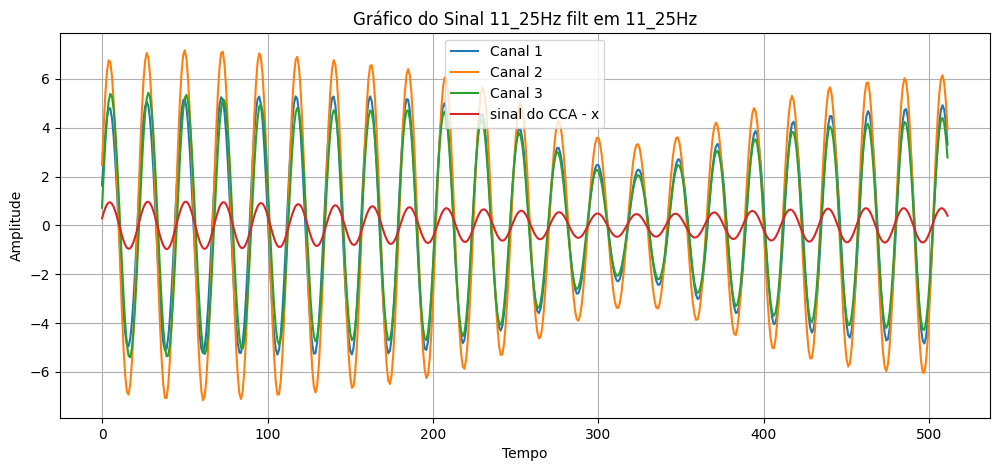

In [ ]:
estim = '11_25'
filt = '11_25'
trial = 10
plt.figure(figsize=(12, 5))
tempo = np.arange(0, epocas_11_25_filt_11_25.shape[1])

plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][0, :, trial], label='Canal 1')
plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][1, :, trial], label='Canal 2')
plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][2, :, trial], label='Canal 3')
# plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][3, :, trial], label='Canal 4')
# plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][4, :, trial], label='Canal 5')
# plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][5, :, trial], label='Canal 6')
# plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][6, :, trial], label='Canal 7')
# plt.plot(tempo, globals()[f'epocas_{estim}_filt_{filt}'][7, :, trial], label='Canal 8')

plt.plot(tempo, globals()[f'CCA_{estim}Hz_{filt}Hz_x_test'][:, 0, trial], label='sinal do CCA - x')

plt.title(f'Gráfico do Sinal {estim}Hz filt em {filt}Hz')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

### 4.2 - Para 4 canais (região occipital)

## 5 - Adicionar o Welch

In [ ]:
# Frequências
frequencias = [9.25, 11.25, 13.25, 9.75, 11.75, 13.75, 10.25, 12.25, 14.25, 10.75, 12.75, 14.75]
canal_escolhido = 6
trial = 10
estim = '13_25'

# Dados
dados = [
    f'dados_{estim}_filt_9_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_11_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_13_25[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_9_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_11_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_13_75[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_10_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_12_25[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_14_25[{canal_escolhido}, :, {trial}]',
    f'dados_{estim}_filt_10_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_12_75[{canal_escolhido}, :, {trial}]', f'dados_{estim}_filt_14_75[{canal_escolhido}, :, {trial}]'
]

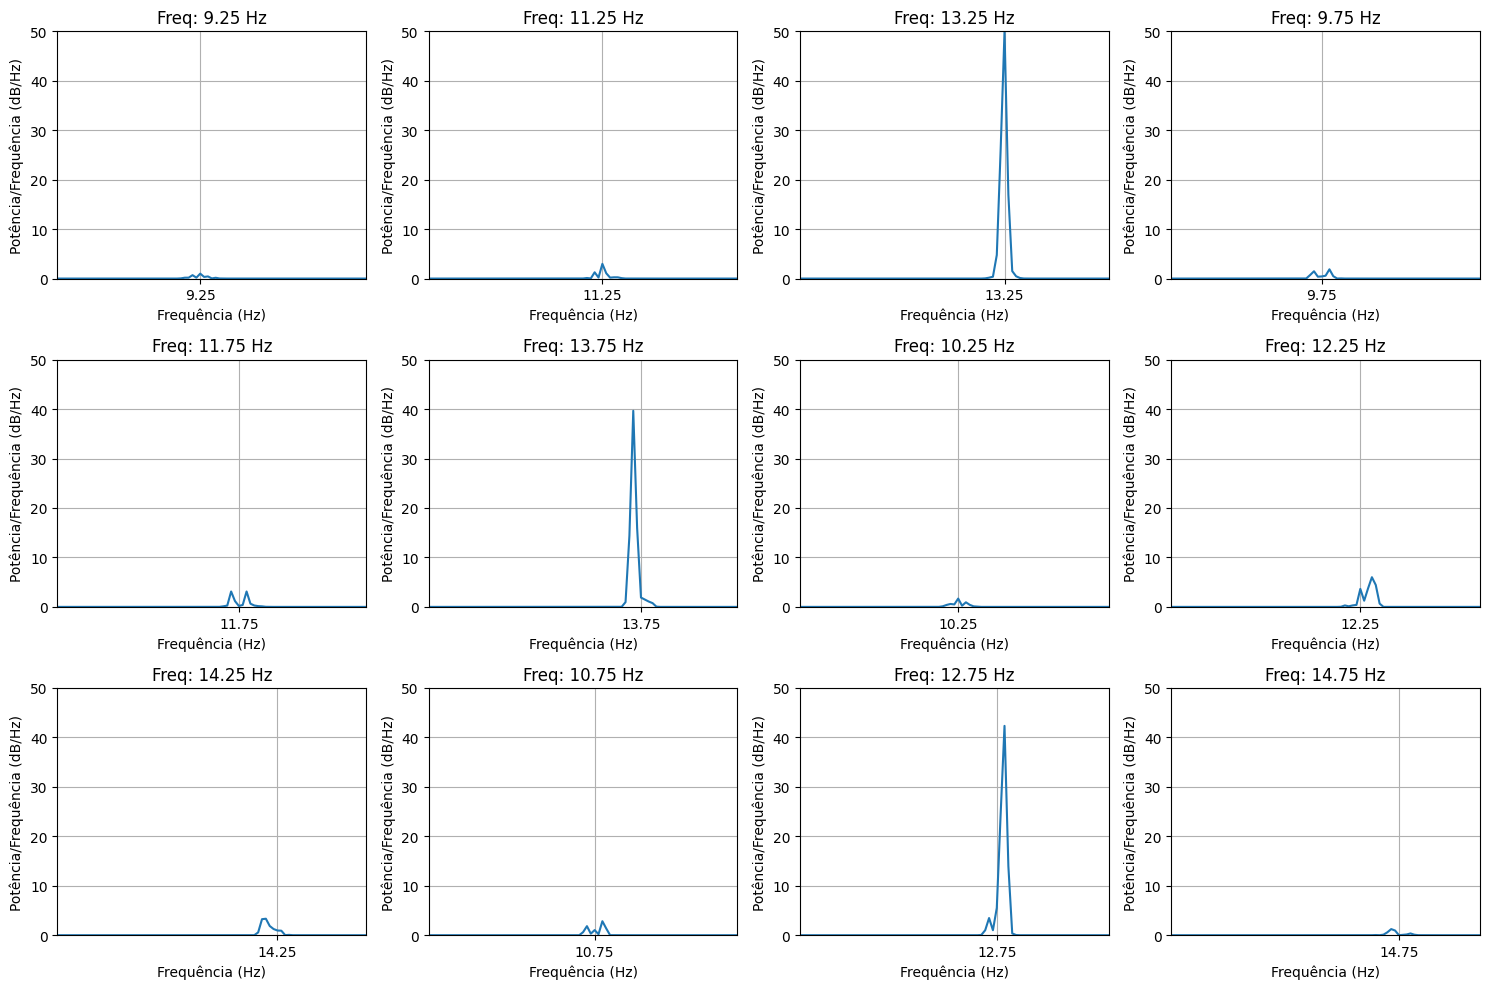

In [ ]:
# Crie um layout de subplots 2x3 (pois você tem 6 conjuntos de dados)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Loop para calcular o PSD e plotar os gráficos
for i, dado_str in enumerate(dados):
    linha = i // 4
    coluna = i % 4

    # Dados reais
    dado = eval(dado_str)

    # Calcular o PSD
    power, freq = psd(dado, NFFT=1024, Fs=fs, noverlap=512)

    # Plotar o gráfico
    axs[linha, coluna].plot(freq, power)
    axs[linha, coluna].set_title(f'Freq: {frequencias[i]} Hz')
    axs[linha, coluna].set_xlabel('Frequência (Hz)')
    axs[linha, coluna].set_ylabel('Potência/Frequência (dB/Hz)')
    axs[linha, coluna].set_ylim([0, 50])
    axs[linha, coluna].set_xlim([0, 20])
    axs[linha, coluna].set_xticks([frequencias[i]])
    axs[linha, coluna].grid()

# Ajustar o espaçamento entre os subplots
plt.tight_layout()
plt.show()


In [ ]:
CCA_9_25Hz_9_25Hz_x_test[:,0,:].shape

(512, 45)

In [ ]:
# def extraction_power(sinal):
#   fs, trecho = sinal.shape
#   power = np.zeros([trecho])
#   for i in range(trecho):
#       _, psd_ = signal.periodogram(sinal[:, i], fs, scaling='density')
#       # psd_, _ = psd(sinal[:, i], NFFT=1024, Fs=fs, noverlap=512)
#       power[i] = np.sum(psd_)
#   return power

def extraction_power(sinal):
    _, trecho = sinal.shape
    fs = 256
    power = np.zeros([trecho])
    for i in range(trecho):
        _, psd_ = signal.periodogram(sinal[:, i], fs, scaling='density')
        # psd_, _ = psd(sinal[:, i], NFFT=1024, Fs=fs, noverlap=512)
        aux = psd_
        psd__ = aux[aux>=0]
        power[i] = np.sum(psd__)
    return power

ref = 0
power_9_25_filt_9_25 = extraction_power(CCA_9_25Hz_9_25Hz_x_test[:,ref,:])
power_9_25_filt_11_25 = extraction_power(CCA_9_25Hz_11_25Hz_x_test[:,ref,:])
power_9_25_filt_13_25 = extraction_power(CCA_9_25Hz_13_25Hz_x_test[:,ref,:])
power_9_25_filt_9_75 = extraction_power(CCA_9_25Hz_9_75Hz_x_test[:,ref,:])
power_9_25_filt_11_75 = extraction_power(CCA_9_25Hz_11_75Hz_x_test[:,ref,:])
power_9_25_filt_13_75 = extraction_power(CCA_9_25Hz_13_75Hz_x_test[:,ref,:])
power_9_25_filt_10_25 = extraction_power(CCA_9_25Hz_10_25Hz_x_test[:,ref,:])
power_9_25_filt_12_25 = extraction_power(CCA_9_25Hz_12_25Hz_x_test[:,ref,:])
power_9_25_filt_14_25 = extraction_power(CCA_9_25Hz_14_25Hz_x_test[:,ref,:])
power_9_25_filt_10_75 = extraction_power(CCA_9_25Hz_10_75Hz_x_test[:,ref,:])
power_9_25_filt_12_75 = extraction_power(CCA_9_25Hz_12_75Hz_x_test[:,ref,:])
power_9_25_filt_14_75 = extraction_power(CCA_9_25Hz_14_75Hz_x_test[:,ref,:])

power_11_25_filt_9_25 = extraction_power(CCA_11_25Hz_9_25Hz_x_test[:,ref,:])
power_11_25_filt_11_25 = extraction_power(CCA_11_25Hz_11_25Hz_x_test[:,ref,:])
power_11_25_filt_13_25 = extraction_power(CCA_11_25Hz_13_25Hz_x_test[:,ref,:])
power_11_25_filt_9_75 = extraction_power(CCA_11_25Hz_9_75Hz_x_test[:,ref,:])
power_11_25_filt_11_75 = extraction_power(CCA_11_25Hz_11_75Hz_x_test[:,ref,:])
power_11_25_filt_13_75 = extraction_power(CCA_11_25Hz_13_75Hz_x_test[:,ref,:])
power_11_25_filt_10_25 = extraction_power(CCA_11_25Hz_10_25Hz_x_test[:,ref,:])
power_11_25_filt_12_25 = extraction_power(CCA_11_25Hz_12_25Hz_x_test[:,ref,:])
power_11_25_filt_14_25 = extraction_power(CCA_11_25Hz_14_25Hz_x_test[:,ref,:])
power_11_25_filt_10_75 = extraction_power(CCA_11_25Hz_10_75Hz_x_test[:,ref,:])
power_11_25_filt_12_75 = extraction_power(CCA_11_25Hz_12_75Hz_x_test[:,ref,:])
power_11_25_filt_14_75 = extraction_power(CCA_11_25Hz_14_75Hz_x_test[:,ref,:])

power_13_25_filt_9_25 = extraction_power(CCA_13_25Hz_9_25Hz_x_test[:,ref,:])
power_13_25_filt_11_25 = extraction_power(CCA_13_25Hz_11_25Hz_x_test[:,ref,:])
power_13_25_filt_13_25 = extraction_power(CCA_13_25Hz_13_25Hz_x_test[:,ref,:])
power_13_25_filt_9_75 = extraction_power(CCA_13_25Hz_9_75Hz_x_test[:,ref,:])
power_13_25_filt_11_75 = extraction_power(CCA_13_25Hz_11_75Hz_x_test[:,ref,:])
power_13_25_filt_13_75 = extraction_power(CCA_13_25Hz_13_75Hz_x_test[:,ref,:])
power_13_25_filt_10_25 = extraction_power(CCA_13_25Hz_10_25Hz_x_test[:,ref,:])
power_13_25_filt_12_25 = extraction_power(CCA_13_25Hz_12_25Hz_x_test[:,ref,:])
power_13_25_filt_14_25 = extraction_power(CCA_13_25Hz_14_25Hz_x_test[:,ref,:])
power_13_25_filt_10_75 = extraction_power(CCA_13_25Hz_10_75Hz_x_test[:,ref,:])
power_13_25_filt_12_75 = extraction_power(CCA_13_25Hz_12_75Hz_x_test[:,ref,:])
power_13_25_filt_14_75 = extraction_power(CCA_13_25Hz_14_75Hz_x_test[:,ref,:])

power_9_75_filt_9_25 = extraction_power(CCA_9_75Hz_9_25Hz_x_test[:,ref,:])
power_9_75_filt_11_25 = extraction_power(CCA_9_75Hz_11_25Hz_x_test[:,ref,:])
power_9_75_filt_13_25 = extraction_power(CCA_9_75Hz_13_25Hz_x_test[:,ref,:])
power_9_75_filt_9_75 = extraction_power(CCA_9_75Hz_9_75Hz_x_test[:,ref,:])
power_9_75_filt_11_75 = extraction_power(CCA_9_75Hz_11_75Hz_x_test[:,ref,:])
power_9_75_filt_13_75 = extraction_power(CCA_9_75Hz_13_75Hz_x_test[:,ref,:])
power_9_75_filt_10_25 = extraction_power(CCA_9_75Hz_10_25Hz_x_test[:,ref,:])
power_9_75_filt_12_25 = extraction_power(CCA_9_75Hz_12_25Hz_x_test[:,ref,:])
power_9_75_filt_14_25 = extraction_power(CCA_9_75Hz_14_25Hz_x_test[:,ref,:])
power_9_75_filt_10_75 = extraction_power(CCA_9_75Hz_10_75Hz_x_test[:,ref,:])
power_9_75_filt_12_75 = extraction_power(CCA_9_75Hz_12_75Hz_x_test[:,ref,:])
power_9_75_filt_14_75 = extraction_power(CCA_9_75Hz_14_75Hz_x_test[:,ref,:])

power_11_75_filt_9_25 = extraction_power(CCA_11_75Hz_9_25Hz_x_test[:,ref,:])
power_11_75_filt_11_25 = extraction_power(CCA_11_75Hz_11_25Hz_x_test[:,ref,:])
power_11_75_filt_13_25 = extraction_power(CCA_11_75Hz_13_25Hz_x_test[:,ref,:])
power_11_75_filt_9_75 = extraction_power(CCA_11_75Hz_9_75Hz_x_test[:,ref,:])
power_11_75_filt_11_75 = extraction_power(CCA_11_75Hz_11_75Hz_x_test[:,ref,:])
power_11_75_filt_13_75 = extraction_power(CCA_11_75Hz_13_75Hz_x_test[:,ref,:])
power_11_75_filt_10_25 = extraction_power(CCA_11_75Hz_10_25Hz_x_test[:,ref,:])
power_11_75_filt_12_25 = extraction_power(CCA_11_75Hz_12_25Hz_x_test[:,ref,:])
power_11_75_filt_14_25 = extraction_power(CCA_11_75Hz_14_25Hz_x_test[:,ref,:])
power_11_75_filt_10_75 = extraction_power(CCA_11_75Hz_10_75Hz_x_test[:,ref,:])
power_11_75_filt_12_75 = extraction_power(CCA_11_75Hz_12_75Hz_x_test[:,ref,:])
power_11_75_filt_14_75 = extraction_power(CCA_11_75Hz_14_75Hz_x_test[:,ref,:])

power_13_75_filt_9_25 = extraction_power(CCA_13_75Hz_9_25Hz_x_test[:,ref,:])
power_13_75_filt_11_25 = extraction_power(CCA_13_75Hz_11_25Hz_x_test[:,ref,:])
power_13_75_filt_13_25 = extraction_power(CCA_13_75Hz_13_25Hz_x_test[:,ref,:])
power_13_75_filt_9_75 = extraction_power(CCA_13_75Hz_9_75Hz_x_test[:,ref,:])
power_13_75_filt_11_75 = extraction_power(CCA_13_75Hz_11_75Hz_x_test[:,ref,:])
power_13_75_filt_13_75 = extraction_power(CCA_13_75Hz_13_75Hz_x_test[:,ref,:])
power_13_75_filt_10_25 = extraction_power(CCA_13_75Hz_10_25Hz_x_test[:,ref,:])
power_13_75_filt_12_25 = extraction_power(CCA_13_75Hz_12_25Hz_x_test[:,ref,:])
power_13_75_filt_14_25 = extraction_power(CCA_13_75Hz_14_25Hz_x_test[:,ref,:])
power_13_75_filt_10_75 = extraction_power(CCA_13_75Hz_10_75Hz_x_test[:,ref,:])
power_13_75_filt_12_75 = extraction_power(CCA_13_75Hz_12_75Hz_x_test[:,ref,:])
power_13_75_filt_14_75 = extraction_power(CCA_13_75Hz_14_75Hz_x_test[:,ref,:])

power_10_25_filt_9_25 = extraction_power(CCA_10_25Hz_9_25Hz_x_test[:,ref,:])
power_10_25_filt_11_25 = extraction_power(CCA_10_25Hz_11_25Hz_x_test[:,ref,:])
power_10_25_filt_13_25 = extraction_power(CCA_10_25Hz_13_25Hz_x_test[:,ref,:])
power_10_25_filt_9_75 = extraction_power(CCA_10_25Hz_9_75Hz_x_test[:,ref,:])
power_10_25_filt_11_75 = extraction_power(CCA_10_25Hz_11_75Hz_x_test[:,ref,:])
power_10_25_filt_13_75 = extraction_power(CCA_10_25Hz_13_75Hz_x_test[:,ref,:])
power_10_25_filt_10_25 = extraction_power(CCA_10_25Hz_10_25Hz_x_test[:,ref,:])
power_10_25_filt_12_25 = extraction_power(CCA_10_25Hz_12_25Hz_x_test[:,ref,:])
power_10_25_filt_14_25 = extraction_power(CCA_10_25Hz_14_25Hz_x_test[:,ref,:])
power_10_25_filt_10_75 = extraction_power(CCA_10_25Hz_10_75Hz_x_test[:,ref,:])
power_10_25_filt_12_75 = extraction_power(CCA_10_25Hz_12_75Hz_x_test[:,ref,:])
power_10_25_filt_14_75 = extraction_power(CCA_10_25Hz_14_75Hz_x_test[:,ref,:])

power_12_25_filt_9_25 = extraction_power(CCA_12_25Hz_9_25Hz_x_test[:,ref,:])
power_12_25_filt_11_25 = extraction_power(CCA_12_25Hz_11_25Hz_x_test[:,ref,:])
power_12_25_filt_13_25 = extraction_power(CCA_12_25Hz_13_25Hz_x_test[:,ref,:])
power_12_25_filt_9_75 = extraction_power(CCA_12_25Hz_9_75Hz_x_test[:,ref,:])
power_12_25_filt_11_75 = extraction_power(CCA_12_25Hz_11_75Hz_x_test[:,ref,:])
power_12_25_filt_13_75 = extraction_power(CCA_12_25Hz_13_75Hz_x_test[:,ref,:])
power_12_25_filt_10_25 = extraction_power(CCA_12_25Hz_10_25Hz_x_test[:,ref,:])
power_12_25_filt_12_25 = extraction_power(CCA_12_25Hz_12_25Hz_x_test[:,ref,:])
power_12_25_filt_14_25 = extraction_power(CCA_12_25Hz_14_25Hz_x_test[:,ref,:])
power_12_25_filt_10_75 = extraction_power(CCA_12_25Hz_10_75Hz_x_test[:,ref,:])
power_12_25_filt_12_75 = extraction_power(CCA_12_25Hz_12_75Hz_x_test[:,ref,:])
power_12_25_filt_14_75 = extraction_power(CCA_12_25Hz_14_75Hz_x_test[:,ref,:])

power_14_25_filt_9_25 = extraction_power(CCA_14_25Hz_9_25Hz_x_test[:,ref,:])
power_14_25_filt_11_25 = extraction_power(CCA_14_25Hz_11_25Hz_x_test[:,ref,:])
power_14_25_filt_13_25 = extraction_power(CCA_14_25Hz_13_25Hz_x_test[:,ref,:])
power_14_25_filt_9_75 = extraction_power(CCA_14_25Hz_9_75Hz_x_test[:,ref,:])
power_14_25_filt_11_75 = extraction_power(CCA_14_25Hz_11_75Hz_x_test[:,ref,:])
power_14_25_filt_13_75 = extraction_power(CCA_14_25Hz_13_75Hz_x_test[:,ref,:])
power_14_25_filt_10_25 = extraction_power(CCA_14_25Hz_10_25Hz_x_test[:,ref,:])
power_14_25_filt_12_25 = extraction_power(CCA_14_25Hz_12_25Hz_x_test[:,ref,:])
power_14_25_filt_14_25 = extraction_power(CCA_14_25Hz_14_25Hz_x_test[:,ref,:])
power_14_25_filt_10_75 = extraction_power(CCA_14_25Hz_10_75Hz_x_test[:,ref,:])
power_14_25_filt_12_75 = extraction_power(CCA_14_25Hz_12_75Hz_x_test[:,ref,:])
power_14_25_filt_14_75 = extraction_power(CCA_14_25Hz_14_75Hz_x_test[:,ref,:])

power_10_75_filt_9_25 = extraction_power(CCA_10_75Hz_9_25Hz_x_test[:,ref,:])
power_10_75_filt_11_25 = extraction_power(CCA_10_75Hz_11_25Hz_x_test[:,ref,:])
power_10_75_filt_13_25 = extraction_power(CCA_10_75Hz_13_25Hz_x_test[:,ref,:])
power_10_75_filt_9_75 = extraction_power(CCA_10_75Hz_9_75Hz_x_test[:,ref,:])
power_10_75_filt_11_75 = extraction_power(CCA_10_75Hz_11_75Hz_x_test[:,ref,:])
power_10_75_filt_13_75 = extraction_power(CCA_10_75Hz_13_75Hz_x_test[:,ref,:])
power_10_75_filt_10_25 = extraction_power(CCA_10_75Hz_10_25Hz_x_test[:,ref,:])
power_10_75_filt_12_25 = extraction_power(CCA_10_75Hz_12_25Hz_x_test[:,ref,:])
power_10_75_filt_14_25 = extraction_power(CCA_10_75Hz_14_25Hz_x_test[:,ref,:])
power_10_75_filt_10_75 = extraction_power(CCA_10_75Hz_10_75Hz_x_test[:,ref,:])
power_10_75_filt_12_75 = extraction_power(CCA_10_75Hz_12_75Hz_x_test[:,ref,:])
power_10_75_filt_14_75 = extraction_power(CCA_10_75Hz_14_75Hz_x_test[:,ref,:])

power_12_75_filt_9_25 = extraction_power(CCA_12_75Hz_9_25Hz_x_test[:,ref,:])
power_12_75_filt_11_25 = extraction_power(CCA_12_75Hz_11_25Hz_x_test[:,ref,:])
power_12_75_filt_13_25 = extraction_power(CCA_12_75Hz_13_25Hz_x_test[:,ref,:])
power_12_75_filt_9_75 = extraction_power(CCA_12_75Hz_9_75Hz_x_test[:,ref,:])
power_12_75_filt_11_75 = extraction_power(CCA_12_75Hz_11_75Hz_x_test[:,ref,:])
power_12_75_filt_13_75 = extraction_power(CCA_12_75Hz_13_75Hz_x_test[:,ref,:])
power_12_75_filt_10_25 = extraction_power(CCA_12_75Hz_10_25Hz_x_test[:,ref,:])
power_12_75_filt_12_25 = extraction_power(CCA_12_75Hz_12_25Hz_x_test[:,ref,:])
power_12_75_filt_14_25 = extraction_power(CCA_12_75Hz_14_25Hz_x_test[:,ref,:])
power_12_75_filt_10_75 = extraction_power(CCA_12_75Hz_10_75Hz_x_test[:,ref,:])
power_12_75_filt_12_75 = extraction_power(CCA_12_75Hz_12_75Hz_x_test[:,ref,:])
power_12_75_filt_14_75 = extraction_power(CCA_12_75Hz_14_75Hz_x_test[:,ref,:])

power_14_75_filt_9_25 = extraction_power(CCA_14_75Hz_9_25Hz_x_test[:,ref,:])
power_14_75_filt_11_25 = extraction_power(CCA_14_75Hz_11_25Hz_x_test[:,ref,:])
power_14_75_filt_13_25 = extraction_power(CCA_14_75Hz_13_25Hz_x_test[:,ref,:])
power_14_75_filt_9_75 = extraction_power(CCA_14_75Hz_9_75Hz_x_test[:,ref,:])
power_14_75_filt_11_75 = extraction_power(CCA_14_75Hz_11_75Hz_x_test[:,ref,:])
power_14_75_filt_13_75 = extraction_power(CCA_14_75Hz_13_75Hz_x_test[:,ref,:])
power_14_75_filt_10_25 = extraction_power(CCA_14_75Hz_10_25Hz_x_test[:,ref,:])
power_14_75_filt_12_25 = extraction_power(CCA_14_75Hz_12_25Hz_x_test[:,ref,:])
power_14_75_filt_14_25 = extraction_power(CCA_14_75Hz_14_25Hz_x_test[:,ref,:])
power_14_75_filt_10_75 = extraction_power(CCA_14_75Hz_10_75Hz_x_test[:,ref,:])
power_14_75_filt_12_75 = extraction_power(CCA_14_75Hz_12_75Hz_x_test[:,ref,:])
power_14_75_filt_14_75 = extraction_power(CCA_14_75Hz_14_75Hz_x_test[:,ref,:])

power_13_75_filt_13_75.shape

(45,)

### 5.1 - Plotar Gráfico para todos os segmentos de cada estímulo (ENERGIA) - 1 sujeito

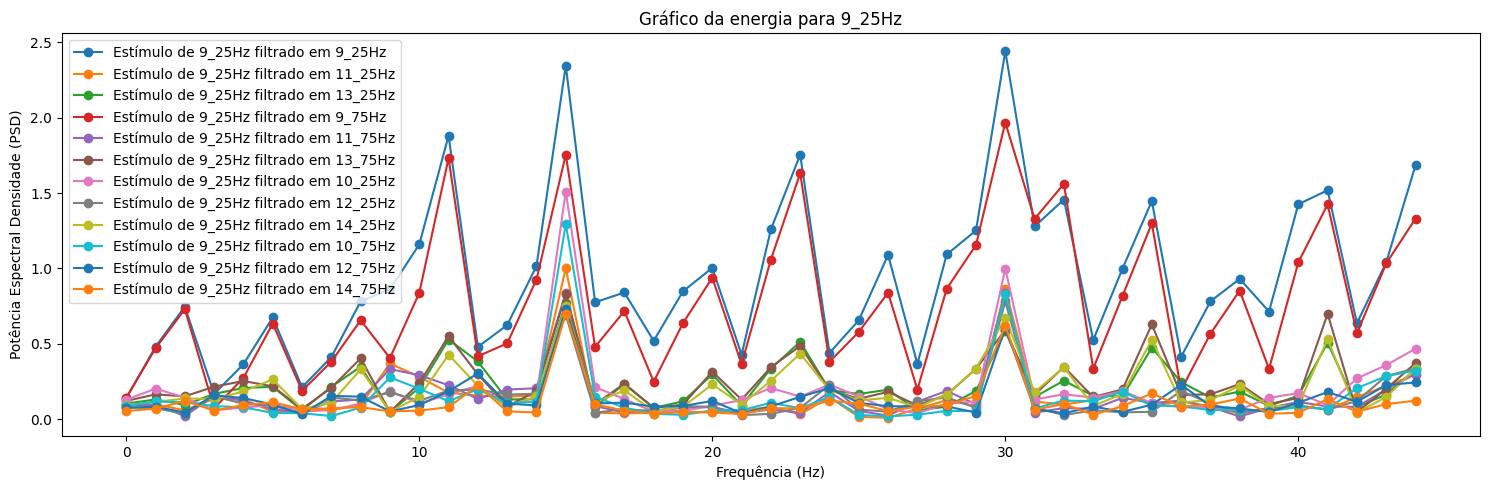

In [ ]:
# Frequências
frequencias = ['9_25', '11_25', '13_25', '9_75', '11_75', '13_75', '10_25', '12_25', '14_25', '10_75', '12_75', '14_75']

estim = '9_25'

plt.subplots(figsize=(15, 5))

# Loop para calcular o PSD e plotar os gráficos
for i in range(len(frequencias)):
    plt.plot(eval(f'power_{estim}_filt_{frequencias[i]}'), '-o', label=f'Estímulo de {estim}Hz filtrado em {frequencias[i]}Hz')
    plt.title(f'Gráfico da energia para {estim}Hz')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Potência Espectral Densidade (PSD)')
    plt.legend()
    plt.grid()

# Ajustar o espaçamento entre os subplots
plt.tight_layout()
plt.show()


## 6 - Classificadores

### 6.1 - Classificação binária

In [ ]:
label = np.array([0, 1])

feature_9_25hz = np.hstack((power_9_25_filt_9_25, power_9_25_filt_11_25))
feature_11_25hz = np.hstack((power_11_25_filt_9_25, power_11_25_filt_11_25))
feature = np.vstack((feature_9_25hz, feature_11_25hz ))

quantidade_conjunto = power_9_25_filt_9_25.shape[0]

labels = np.repeat(label, quantidade_conjunto)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(feature.T, labels, test_size=0.3, random_state=42)

In [ ]:
feature.shape, feature_9_25hz.shape[0], labels.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2, 90), 90, (90,), (63, 2), (27, 2), (63,), (27,))

#### 6.1.1 - LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

predictions = lda.predict(X_test) # Realizando a previsão do meu classificador com os dados para teste

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

96.29629629629629
Matriz de Confusão:
[[14  1]
 [ 0 12]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        12

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



#### 6.1.2 - KNeighborsClassifier

In [ ]:
knn =  KNeighborsClassifier(n_neighbors = 20)
clf = knn.fit(X_train,y_train)
#Fazendo predições utilizado os valores do conjunto de validação
predictions = knn.predict(X_test)

#Usando a predição obtida e a classe real, calcular e imprimir a acurácia
acc = accuracy_score(y_test, predictions)
print(acc*100)
#Usando a predição obtida e a classe real, obter a confusion matrix
print(confusion_matrix(y_test, predictions))

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

92.5925925925926
[[13  2]
 [ 0 12]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.86      1.00      0.92        12

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27




#### 6.1.3 - SVM

In [ ]:
# Criar e treinar o modelo SVM
svm = SVC(C=1.0, decision_function_shape='ovr').fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = svm.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy*100:.2f}')

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

Acurácia do modelo: 96.30
Matriz de Confusão:
[[14  1]
 [ 0 12]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        12

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



#### 6.1.4 - GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = gb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

96.29629629629629
Matriz de Confusão:
[[14  1]
 [ 0 12]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        12

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



#### 6.1.5 - LightGBM

In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2, n_estimators=1000)
lgbm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = lgbm.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


[LightGBM] [Info] Number of positive: 33, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523810 -> initscore=0.095310
[LightGBM] [Info] Start training from score 0.095310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

#### 6.1.6 - RandomFlorestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

predictions = rf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

Acurácia: 96.30%
Matriz de Confusão:
[[14  1]
 [ 0 12]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        12

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



#### 6.1.7 - Ensemble

In [ ]:
## Ensemble de Votação (Random Forest e Gradient Boosting):
ensemble_classifier = VotingClassifier(estimators=[
    ('lgbm', lgbm),
    ('gb', rf)
]).fit(X_train, y_train)
predictions = ensemble_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

[LightGBM] [Info] Number of positive: 33, number of negative: 30
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523810 -> initscore=0.095310
[LightGBM] [Info] Start training from score 0.095310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### 6.2 - Classificação multiclasse - 6 classes

In [ ]:
label = np.array([0, 1, 2, 3, 4, 5 ])

feature_9_25hz = np.hstack((power_9_25_filt_9_25, power_9_25_filt_11_25, power_9_25_filt_13_25, power_9_25_filt_10_25, power_9_25_filt_12_25, power_9_25_filt_14_25))
feature_11_25hz = np.hstack((power_11_25_filt_9_25, power_11_25_filt_11_25, power_11_25_filt_13_25, power_11_25_filt_10_25, power_11_25_filt_12_25, power_11_25_filt_14_25))
feature_13_25hz = np.hstack((power_13_25_filt_9_25, power_13_25_filt_11_25,power_13_25_filt_13_25, power_13_25_filt_10_25, power_13_25_filt_12_25, power_13_25_filt_14_25))
feature_10_25hz = np.hstack((power_10_25_filt_9_25, power_10_25_filt_11_25, power_10_25_filt_13_25, power_10_25_filt_10_25, power_10_25_filt_12_25, power_10_25_filt_14_25 ))
feature_12_25hz = np.hstack((power_12_25_filt_9_25, power_12_25_filt_11_25, power_12_25_filt_13_25, power_12_25_filt_10_25, power_12_25_filt_12_25, power_12_25_filt_14_25 ))
feature_14_25hz = np.hstack((power_14_25_filt_9_25, power_14_25_filt_11_25, power_14_25_filt_13_25, power_14_25_filt_10_25, power_14_25_filt_12_25, power_14_25_filt_14_25 ))


feature = np.vstack((feature_9_25hz, feature_11_25hz, feature_13_25hz, feature_10_25hz, feature_12_25hz, feature_14_25hz))


labels = np.repeat(label, len(power_9_25_filt_9_25))

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(feature.T, labels, test_size=0.3, random_state=42)


#### 6.2.1 - LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

predictions = lda.predict(X_test) # Realizando a previsão do meu classificador com os dados para teste

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


88.88888888888889
Matriz de Confusão:
[[11  1  2  0  0  1]
 [ 1 12  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 1  0  0  8  0  1]
 [ 1  0  0  0 15  0]
 [ 0  0  1  0  0 11]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.92      0.92      0.92        13
           2       0.83      1.00      0.91        15
           3       1.00      0.80      0.89        10
           4       1.00      0.94      0.97        16
           5       0.85      0.92      0.88        12

    accuracy                           0.89        81
   macro avg       0.90      0.89      0.89        81
weighted avg       0.89      0.89      0.89        81



#### 6.2.2 - KNeighborsClassifier

In [ ]:
knn =  KNeighborsClassifier(n_neighbors = 20)
clf = knn.fit(X_train,y_train)
#Fazendo predições utilizado os valores do conjunto de validação
predictions = knn.predict(X_test)

#Usando a predição obtida e a classe real, calcular e imprimir a acurácia
acc = accuracy_score(y_test, predictions)
print(acc*100)
#Usando a predição obtida e a classe real, obter a confusion matrix
print(confusion_matrix(y_test, predictions))

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

80.24691358024691
[[10  1  2  0  1  1]
 [ 2 10  0  0  1  0]
 [ 1  0 14  0  0  0]
 [ 1  0  1  7  0  1]
 [ 1  0  1  0 14  0]
 [ 0  0  1  1  0 10]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.91      0.77      0.83        13
           2       0.74      0.93      0.82        15
           3       0.88      0.70      0.78        10
           4       0.88      0.88      0.88        16
           5       0.83      0.83      0.83        12

    accuracy                           0.80        81
   macro avg       0.82      0.80      0.80        81
weighted avg       0.81      0.80      0.80        81



#### 6.2.3 - SVM

In [ ]:
# Criar e treinar o modelo SVM
svm = SVC(C=1.0, decision_function_shape='ovr').fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = svm.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy*100:.2f}')

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

Acurácia do modelo: 81.48
Matriz de Confusão:
[[11  1  2  0  0  1]
 [ 1 12  0  0  0  0]
 [ 3  0 11  0  1  0]
 [ 1  0  0  8  0  1]
 [ 2  0  0  1 13  0]
 [ 0  0  0  1  0 11]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.92      0.92      0.92        13
           2       0.85      0.73      0.79        15
           3       0.80      0.80      0.80        10
           4       0.93      0.81      0.87        16
           5       0.85      0.92      0.88        12

    accuracy                           0.81        81
   macro avg       0.83      0.82      0.82        81
weighted avg       0.83      0.81      0.82        81



#### 6.2.4 - GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = gb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

88.88888888888889
Matriz de Confusão:
[[10  2  1  1  0  1]
 [ 0 13  0  0  0  0]
 [ 1  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 1  1  0  0 14  0]
 [ 0  0  0  1  0 11]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.81      1.00      0.90        13
           2       0.93      0.93      0.93        15
           3       0.83      1.00      0.91        10
           4       1.00      0.88      0.93        16
           5       0.92      0.92      0.92        12

    accuracy                           0.89        81
   macro avg       0.89      0.90      0.89        81
weighted avg       0.89      0.89      0.89        81



#### 6.2.5 - LightGBM

In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2, objective='multiclass', n_estimators=1000, metric='multi_error')
lgbm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = lgbm.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

#### 6.2.6 - RandomFlorestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

predictions = rf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


Acurácia: 88.89%
Matriz de Confusão:
[[10  2  1  1  0  1]
 [ 0 13  0  0  0  0]
 [ 1  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 1  1  0  0 14  0]
 [ 0  0  0  1  0 11]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.81      1.00      0.90        13
           2       0.93      0.93      0.93        15
           3       0.83      1.00      0.91        10
           4       1.00      0.88      0.93        16
           5       0.92      0.92      0.92        12

    accuracy                           0.89        81
   macro avg       0.89      0.90      0.89        81
weighted avg       0.89      0.89      0.89        81



#### 6.2.7 - Ensemble

In [ ]:
## Ensemble de Votação (Random Forest e Gradient Boosting):
ensemble_classifier = VotingClassifier(estimators=[
    ('lgbm', lgbm),
    ('gb', rf)
]).fit(X_train, y_train)
predictions = ensemble_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

### 6.3 - Classificação multiclasse completo

In [ ]:
feature_9_25hz = np.hstack((power_9_25_filt_9_25, power_9_25_filt_11_25, power_9_25_filt_13_25, power_9_25_filt_9_75, power_9_25_filt_11_75, power_9_25_filt_13_75, power_9_25_filt_10_25, power_9_25_filt_12_25, power_9_25_filt_14_25, power_9_25_filt_10_75, power_9_25_filt_12_75, power_9_25_filt_14_75))
feature_11_25hz = np.hstack((power_11_25_filt_9_25, power_11_25_filt_11_25, power_11_25_filt_13_25, power_11_25_filt_9_75, power_11_25_filt_11_75, power_11_25_filt_13_75, power_11_25_filt_10_25, power_11_25_filt_12_25, power_11_25_filt_14_25, power_11_25_filt_10_75, power_11_25_filt_12_75, power_11_25_filt_14_75 ))
feature_13_25hz = np.hstack((power_13_25_filt_9_25, power_13_25_filt_11_25, power_13_25_filt_13_25, power_13_25_filt_9_75, power_13_25_filt_11_75, power_13_25_filt_13_75, power_13_25_filt_10_25, power_13_25_filt_12_25, power_13_25_filt_14_25, power_13_25_filt_10_75, power_13_25_filt_12_75, power_13_25_filt_14_75))
feature_9_75hz = np.hstack((power_9_75_filt_9_25, power_9_75_filt_11_25, power_9_75_filt_13_25, power_9_75_filt_9_75, power_9_75_filt_11_75, power_9_75_filt_13_75, power_9_75_filt_10_25, power_9_75_filt_12_25, power_9_75_filt_14_25, power_9_75_filt_10_75, power_9_75_filt_12_75, power_9_75_filt_14_75))
feature_11_75hz = np.hstack((power_11_75_filt_9_25, power_11_75_filt_11_25, power_11_75_filt_13_25, power_11_75_filt_9_75, power_11_75_filt_11_75, power_11_75_filt_13_75, power_11_75_filt_10_25, power_11_75_filt_12_25, power_11_75_filt_14_25, power_11_75_filt_10_75, power_11_75_filt_12_75, power_11_75_filt_14_75))
feature_13_75hz = np.hstack((power_13_75_filt_9_25, power_13_75_filt_11_25, power_13_75_filt_13_25, power_13_75_filt_9_75, power_13_75_filt_11_75, power_13_75_filt_13_75, power_13_75_filt_10_25, power_13_75_filt_12_25, power_13_75_filt_14_25, power_13_75_filt_10_75, power_13_75_filt_12_75, power_13_75_filt_14_75))
feature_10_25hz = np.hstack((power_10_25_filt_9_25, power_10_25_filt_11_25, power_10_25_filt_13_25, power_10_25_filt_9_75, power_10_25_filt_11_75, power_10_25_filt_13_75, power_10_25_filt_10_25, power_10_25_filt_12_25, power_10_25_filt_14_25, power_10_25_filt_10_75, power_10_25_filt_12_75, power_10_25_filt_14_75 ))
feature_12_25hz = np.hstack((power_12_25_filt_9_25, power_12_25_filt_11_25, power_12_25_filt_13_25, power_12_25_filt_9_75, power_12_25_filt_11_75, power_12_25_filt_13_75, power_12_25_filt_10_25, power_12_25_filt_12_25, power_12_25_filt_14_25, power_12_25_filt_10_75, power_12_25_filt_12_75, power_12_25_filt_14_75 ))
feature_14_25hz = np.hstack((power_14_25_filt_9_25, power_14_25_filt_11_25, power_14_25_filt_13_25, power_14_25_filt_9_75, power_14_25_filt_11_75, power_14_25_filt_13_75, power_14_25_filt_10_25, power_14_25_filt_12_25, power_14_25_filt_14_25, power_14_25_filt_10_75, power_14_25_filt_12_75, power_14_25_filt_14_75 ))
feature_10_75hz = np.hstack((power_10_75_filt_9_25, power_10_75_filt_11_25, power_10_75_filt_13_25, power_10_75_filt_9_75, power_10_75_filt_11_75, power_10_75_filt_13_75, power_10_75_filt_10_25, power_10_75_filt_12_25, power_10_75_filt_14_25, power_10_75_filt_10_75, power_10_75_filt_12_75, power_10_75_filt_14_75 ))
feature_12_75hz = np.hstack((power_12_75_filt_9_25, power_12_75_filt_11_25, power_12_75_filt_13_25, power_12_75_filt_9_75, power_12_75_filt_11_75, power_12_75_filt_13_75, power_12_75_filt_10_25, power_12_75_filt_12_25, power_12_75_filt_14_25, power_12_75_filt_10_75, power_12_75_filt_12_75, power_12_75_filt_14_75 ))
feature_14_75hz = np.hstack((power_14_75_filt_9_25, power_14_75_filt_11_25, power_14_75_filt_13_25, power_14_75_filt_9_75, power_14_75_filt_11_75, power_14_75_filt_13_75, power_14_75_filt_10_25, power_14_75_filt_12_25, power_14_75_filt_14_25, power_14_75_filt_10_75, power_14_75_filt_12_75, power_14_75_filt_14_75 ))

feature_9_25hz.shape

(540,)

In [ ]:
# Criar os dados de entrada (features) e rótulos (labels)
feature = np.vstack((feature_9_25hz, feature_11_25hz, feature_13_25hz,
                     feature_9_75hz, feature_11_75hz, feature_13_75hz,
                     feature_10_25hz, feature_12_25hz, feature_14_25hz,
                     feature_10_75hz, feature_12_75hz, feature_14_75hz))

label = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

labels = np.repeat(label, len(power_9_25_filt_9_25))

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(feature.T, labels, test_size=0.3, random_state=42)

In [ ]:
feature.shape, feature_9_25hz.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape, labels.shape

((12, 540), (540,), (378, 12), (162, 12), (378,), (162,), (540,))

#### 6.3.1 - LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

predictions = lda.predict(X_test) # Realizando a previsão do meu classificador com os dados para teste

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


90.12345679012346
Matriz de Confusão:
[[15  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 16  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  9  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  9  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 11  0  0  1  0  0  0]
 [ 0  0  0  1  0  0 11  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  9  0  0  4  0]
 [ 0  0  0  0  0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.94      0.89      0.91        18
           2       1.00      0.90      0.95        10
           3       0.87      1.00      0.93        13
           4       0.90      0.75      0.82        12
           5       0.85      0.92      0.88        12
           6       1.00      0.92      0.96        12
           7       1.00      0.

#### 6.3.2 -  KNeighborsClassifier

In [ ]:
knn =  KNeighborsClassifier(n_neighbors = 20)
clf = knn.fit(X_train,y_train)
#Fazendo predições utilizado os valores do conjunto de validação
predictions = knn.predict(X_test)

#Usando a predição obtida e a classe real, calcular e imprimir a acurácia
acc = accuracy_score(y_test, predictions)
print(acc*100)
#Usando a predição obtida e a classe real, obter a confusion matrix
print(confusion_matrix(y_test, predictions))

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

80.24691358024691
[[14  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  9  0  0  0  0  0  0  0  1  0]
 [ 2  0  0 10  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  8  0  0  0  0  0  1  2]
 [ 0  0  0  0  0 11  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  8  0]
 [ 0  0  0  0  0  1  0  1 13  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  9  0  1]
 [ 0  0  0  0  0  0  0  4  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 14]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.88      0.83      0.86        18
           2       1.00      0.90      0.95        10
           3       0.83      0.77      0.80        13
           4       1.00      0.67      0.80        12
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00        12
           7       0.55      0.43      0.48        

#### 6.3.3 - SVM

In [ ]:
# Criar e treinar o modelo SVM
svm = SVC(C=1.0, decision_function_shape='ovr').fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = svm.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo: {accuracy*100:.2f}')

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

Acurácia do modelo: 83.33
Matriz de Confusão:
[[11  0  0  5  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  9  0  0  0  0  0  0  0  1  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  6  0  0  1  0  1  1  1]
 [ 0  0  0  0  0 11  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  5  0]
 [ 0  0  0  0  0  1  0  0 14  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  9  0  1]
 [ 0  0  0  0  0  0  0  2  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.94      0.83      0.88        18
           2       0.90      0.90      0.90        10
           3       0.68      1.00      0.81        13
           4       1.00      0.50      0.67        12
           5       0.92      0.92      0.92        12
           6       1.00      1.00      1.00        12
           7       0.75

#### 6.3.4 - GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = gb.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(accuracy*100)

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

91.9753086419753
Matriz de Confusão:
[[14  0  0  2  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0]
 [ 1  1  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 1  0  0  1  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 15  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  1]
 [ 0  0  0  0  0  0  0  3  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.94      0.89      0.91        18
           2       1.00      1.00      1.00        10
           3       0.81      1.00      0.90        13
           4       1.00      0.83      0.91        12
           5       0.92      1.00      0.96        12
           6       0.92      1.00      0.96        12
           7       0.80      0.8

#### 6.3.5 - LightGBM

In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.2, objective='multiclass', n_estimators=100, metric='multi_error')
lgbm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = lgbm.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 12
[LightGBM] [Info] Start training from score -2.567598
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -2.379546
[LightGBM] [Info] Start training from score -2.469158
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.500907
[LightGBM] [Info] Start training from score -2.567598
[LightGBM] [Info] Start training from score -2.408534
[LightGBM] [Info] Start training from score -2.469158
[LightGBM] [Info] Start training from score -2.533697
[LightGBM] [Warning] No further splits with positive gain, best g

#### 6.3.6 - RandomFlorestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

predictions = rf.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))


Acurácia: 92.59%
Matriz de Confusão:
[[14  1  0  1  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 10  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 12  0  0  0  1]
 [ 0  0  0  0  0  2  0  0 14  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  1  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.85      0.94      0.89        18
           2       1.00      1.00      1.00        10
           3       0.87      1.00      0.93        13
           4       1.00      0.83      0.91        12
           5       0.85      0.92      0.88        12
           6       1.00      1.00      1.00        12
           7       0.86      0.8

#### 6.3.7 - Ensemble

In [ ]:
## Ensemble de Votação (Random Forest e Gradient Boosting):
ensemble_classifier = VotingClassifier(estimators=[
    ('lgbm', lgbm),
    ('gb', rf)
]).fit(X_train, y_train)
predictions = ensemble_classifier.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia: {accuracy * 100:.2f}%')

confusion = confusion_matrix(y_test, predictions)
print('Matriz de Confusão:')
print(confusion)

# Exibir relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, predictions))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 12
[LightGBM] [Info] Start training from score -2.567598
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -2.379546
[LightGBM] [Info] Start training from score -2.469158
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.438387
[LightGBM] [Info] Start training from score -2.500907
[LightGBM] [Info] Start training from score -2.567598
[LightGBM] [Info] Start training from score -2.408534
[LightGBM] [Info] Start training from score -2.469158
[LightGBM] [Info] Start training from score -2.533697
[LightGBM] [Warning] No further splits with positive gain, best g

## 7 - Otimização de hiperparâmetro